<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

In [4]:
tf.__version__

'2.18.0'

In [5]:
!apt install graphviz
import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# 1.0 Upload Data

## 1.1 Functions:

In [6]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

## **1.2 Importing the Dataset**

### **1.2.1 Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [7]:
ext_data=True

if ext_data==False:
  df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
  df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  df_test.shape

if ext_data==True:
  df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
  df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  print(df_test.shape,df_train.shape)

(3644, 669) (177024, 670)


In [8]:
df_train.p_num.value_counts()

p_num
p03    26028
p02    25872
p10    25454
p12    25299
p04    24686
p11    24555
p01     8459
p06     8383
p05     8288
Name: count, dtype: int64

In [9]:
df_train.p_num = df_train.p_num.astype("str")
df_test.p_num = df_test.p_num.astype("str")

In [10]:
#df_train.groupby(["cluster"])["p_num"].count()

In [11]:
#df_train.groupby(["cluster","p_num"])["p_num"].count()[8]

In [12]:
df_train.head()
df_train.columns

Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
       'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30',
       ...
       'enc_07_v7', 'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7',
       'enc_06_v6', 'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'],
      dtype='object', length=670)

In [13]:
#df_all = pd.concat([df_train,df_test])

Sub-dataset are created for each main set of features to inpute missing values:

In [14]:
# # Select columns containing the word "bg"
# bg_col_train = df_train.filter(regex='bg|time|p_num|hour|minute')
# bg_col_test = df_test.filter(regex='bg|time|p_num|hour|minute')

# insulin_col_train = df_train.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
# insulin_col_test = df_test.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
# insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

# carb_col_train = df_train.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
# carb_col_test = df_test.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
# carb_col_train["bg+1:00"] = df_train["bg+1:00"]

# hr_col_train = df_train.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
# hr_col_test = df_test.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
# hr_col_train["bg+1:00"] = df_train["bg+1:00"]

# step_col_train = df_train.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
# step_col_test = df_test.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
# step_col_train["bg+1:00"] = df_train["bg+1:00"]

# cal_col_train = df_train.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
# cal_col_test = df_test.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
# cal_col_train["bg+1:00"] = df_train["bg+1:00"]

# act_col_train = df_train.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
# act_col_test = df_test.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
# act_col_train["bg+1:00"] = df_train["bg+1:00"]

In [15]:
print(df_train.shape)
display(dict(df_train.groupby("p_num")["p_num"].count()))
display(dict(df_test.groupby("p_num")["p_num"].count()))
#display(df_train[df_train["p_num"]=="p01"].head())
#display(df_train[df_train["p_num"]=="p02"].head())

(177024, 670)


{'p01': 8459,
 'p02': 25872,
 'p03': 26028,
 'p04': 24686,
 'p05': 8288,
 'p06': 8383,
 'p10': 25454,
 'p11': 24555,
 'p12': 25299}

{'p01': 244,
 'p02': 227,
 'p04': 258,
 'p05': 276,
 'p06': 234,
 'p10': 179,
 'p11': 221,
 'p12': 288,
 'p15': 294,
 'p16': 248,
 'p18': 231,
 'p19': 246,
 'p21': 236,
 'p22': 201,
 'p24': 261}

##### **Cross-Validation Strategy:**

- *p03*: this individual is not among the test population. Therefore, it is heavily sampled by this observations. Total sampled: 25%/6028 obs.  
- *Other*: About 5% of the onbs.

##### - Validation List 0

In [16]:
unique_ind = df_train.groupby("p_num")["p_num"].count().index.tolist()
#display(df_train.groupby("p_num")["p_num"].count())
#unique_ind.remove("p03")
print(df_train.shape)
val_index = []
# new_val_p01 = [f"p01_{vali}" for vali in range(8_000,8459)]
# new_val_p02 = [f"p02_{vali}" for vali in range(24_000,25_872)]
# new_val_p03 = [f"p03_{vali}" for vali in range(23_500,26_028)]
# new_val_p04 = [f"p04_{vali}" for vali in range(23_500,24_686)]
# new_val_p05 = [f"p05_{vali}" for vali in range(7800,8288)]
# new_val_p06 = [f"p06_{vali}" for vali in range(7900,8383)]
# new_val_p10 = [f"p10_{vali}" for vali in range(24_500,25454)]
# new_val_p11 = [f"p11_{vali}" for vali in range(23_500,24555)]
# new_val_p12 = [f"p12_{vali}" for vali in range(24_000,25299)]

new_val_p01 = list(df_train[(df_train["p_num"]=="p01")&(df_train["obv_n"]>=7150)].index)
new_val_p02 = list(df_train[(df_train["p_num"]=="p02")&(df_train["obv_n"]>=20500)].index)
new_val_p03 = list(df_train[(df_train["p_num"]=="p03")&(df_train["obv_n"]>=21000)].index)
new_val_p04 = list(df_train[(df_train["p_num"]=="p04")&(df_train["obv_n"]>=20500)].index)
new_val_p05 = list(df_train[(df_train["p_num"]=="p05")&(df_train["obv_n"]>=7150)].index)
new_val_p06 = list(df_train[(df_train["p_num"]=="p06")&(df_train["obv_n"]>=7150)].index)
new_val_p10 = list(df_train[(df_train["p_num"]=="p10")&(df_train["obv_n"]>=20500)].index)
new_val_p11 = list(df_train[(df_train["p_num"]=="p11")&(df_train["obv_n"]>=20500)].index)
new_val_p12 = list(df_train[(df_train["p_num"]=="p12")&(df_train["obv_n"]>=20500)].index)

val_index.append(new_val_p01)
val_index.append(new_val_p02)
val_index.append(new_val_p03)
val_index.append(new_val_p04)
val_index.append(new_val_p05)
val_index.append(new_val_p06)
val_index.append(new_val_p10)
val_index.append(new_val_p11)
val_index.append(new_val_p12)
#unique_ind
val_list_v0 = [item for row in val_index for item in row]
print(len(val_list_v0)/float(df_train.shape[0]))

(177024, 670)
0.18118447216196673


##### - Validation List 1

In [17]:
unique_ind = df_train.groupby("p_num")["p_num"].count().index.tolist()
#display(df_train.groupby("p_num")["p_num"].count())
#unique_ind.remove("p03")
print(df_train.shape)
val_index = []
new_val_p01 = [f"p01_{vali}" for vali in range(1200)]
new_val_p02 = [f"p02_{vali}" for vali in range(4800)]
new_val_p03 = [f"p03_{vali}" for vali in range(6500)]
new_val_p04 = [f"p04_{vali}" for vali in range(3000)]
new_val_p05 = [f"p05_{vali}" for vali in range(1270)]
new_val_p06 = [f"p06_{vali}" for vali in range(1270)]
new_val_p10 = [f"p10_{vali}" for vali in range(3000)]
new_val_p11 = [f"p11_{vali}" for vali in range(3050)]
new_val_p12 = [f"p12_{vali}" for vali in range(3600)]

val_index.append(new_val_p01)
val_index.append(new_val_p02)
val_index.append(new_val_p03)
val_index.append(new_val_p04)
val_index.append(new_val_p05)
val_index.append(new_val_p06)
val_index.append(new_val_p10)
val_index.append(new_val_p11)
val_index.append(new_val_p12)
#unique_ind
val_list_v1 = [item for row in val_index for item in row]
print(len(val_list_v1)/float(df_train.shape[0]))

(177024, 670)
0.15641946854663774


##### - Validation List 2: it Removes "p03" from the training:

In [18]:
val_index = []

new_val_p03 = list(df_train[df_train["p_num"]=="p03"].index)

new_val_p01 = [f"p01_{vali}" for vali in range(8459,8459)]
new_val_p02 = [f"p02_{vali}" for vali in range(24_000,25_872)]
new_val_p04 = [f"p04_{vali}" for vali in range(23_500,24_686)]
new_val_p05 = [f"p05_{vali}" for vali in range(7800,8288)]
new_val_p06 = [f"p06_{vali}" for vali in range(7900,8383)]
new_val_p10 = [f"p10_{vali}" for vali in range(24_500,25454)]
new_val_p11 = [f"p11_{vali}" for vali in range(23_500,24555)]
new_val_p12 = [f"p12_{vali}" for vali in range(24_000,25299)]

val_index.append(new_val_p01)
val_index.append(new_val_p02)
val_index.append(new_val_p03)
val_index.append(new_val_p04)
val_index.append(new_val_p05)
val_index.append(new_val_p06)
val_index.append(new_val_p10)
val_index.append(new_val_p11)
val_index.append(new_val_p12)

val_list_v2 = [item for row in val_index for item in row]
print(len(val_list_v2)/float(df_train.shape[0]))

0.18847726861894432


##### - Validation List 3

In [19]:
_, vld = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train["p_num"], shuffle=True)
val_list_v3 = vld.index.tolist()
print(len(val_list_v3)/float(df_train.shape[0]))

0.20000112979031093


##### - Validation List 4

In [20]:
unique_ind = df_train.groupby("p_num")["p_num"].count().index.tolist()
#display(df_train.groupby("p_num")["p_num"].count())
#unique_ind.remove("p03")
print(df_train.shape)
val_index = []
# new_val_p01 = [f"p01_{vali}" for vali in range(8_000,8459)]
# new_val_p02 = [f"p02_{vali}" for vali in range(24_000,25_872)]
# new_val_p03 = [f"p03_{vali}" for vali in range(23_500,26_028)]
# new_val_p04 = [f"p04_{vali}" for vali in range(23_500,24_686)]
# new_val_p05 = [f"p05_{vali}" for vali in range(7800,8288)]
# new_val_p06 = [f"p06_{vali}" for vali in range(7900,8383)]
# new_val_p10 = [f"p10_{vali}" for vali in range(24_500,25454)]
# new_val_p11 = [f"p11_{vali}" for vali in range(23_500,24555)]
# new_val_p12 = [f"p12_{vali}" for vali in range(24_000,25299)]

new_val_p01 = list(df_train[(df_train["p_num"]=="p01")&(df_train["obv_n"]>=6300)&(df_train["obv_n"]<=7600)].index)
new_val_p02 = list(df_train[(df_train["p_num"]=="p02")&(df_train["obv_n"]>=17100)&(df_train["obv_n"]<=20500)].index)
new_val_p03 = list(df_train[(df_train["p_num"]=="p03")&(df_train["obv_n"]>=16500)&(df_train["obv_n"]<=21000)].index)
new_val_p04 = list(df_train[(df_train["p_num"]=="p04")&(df_train["obv_n"]>=16500)&(df_train["obv_n"]<=20000)].index)
new_val_p05 = list(df_train[(df_train["p_num"]=="p05")&(df_train["obv_n"]>=5200)&(df_train["obv_n"]<=6600)].index)
new_val_p06 = list(df_train[(df_train["p_num"]=="p06")&(df_train["obv_n"]>=4800)&(df_train["obv_n"]<=6000)].index)
new_val_p10 = list(df_train[(df_train["p_num"]=="p10")&(df_train["obv_n"]>=16500)&(df_train["obv_n"]<=20000)].index)
new_val_p11 = list(df_train[(df_train["p_num"]=="p11")&(df_train["obv_n"]>=16500)&(df_train["obv_n"]<=20000)].index)
new_val_p12 = list(df_train[(df_train["p_num"]=="p12")&(df_train["obv_n"]>=14000)&(df_train["obv_n"]<=17500)].index)

val_index.append(new_val_p01)
val_index.append(new_val_p02)
val_index.append(new_val_p03)
val_index.append(new_val_p04)
val_index.append(new_val_p05)
val_index.append(new_val_p06)
val_index.append(new_val_p10)
val_index.append(new_val_p11)
val_index.append(new_val_p12)
#unique_ind
val_list_v4 = [item for row in val_index for item in row]
print(len(val_list_v4)/float(df_train.shape[0]))

(177024, 670)
0.14579379067245118


In [21]:
val_sets = [val_list_v0,val_list_v1,val_list_v2,val_list_v3,val_list_v4]

###  **1.2.2 Data Preparation:**

Data are scaled in groups.

In [22]:
df_train.columns[-20:],df_train.columns[:20]

(Index(['activity-0:05', 'activity-0:00', 'bg+1:00', 'cluster', 'cluster_pca',
        'PC_1', 'PC_2', 'PC_3', 'enc_04_v7', 'enc_01_v1', 'enc_07_v7',
        'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7', 'enc_06_v6',
        'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'],
       dtype='object'),
 Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
        'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30', 'brake-5:25',
        'brake-5:20', 'brake-5:15', 'brake-5:10', 'brake-5:05', 'brake-5:00',
        'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40'],
       dtype='object'))

In [23]:
X_train = df_train.drop(columns=["p_num","obv_n"]).copy()
X_test = df_test.drop(columns=["p_num","obv_n"]).copy()

#X_train = df_train.drop(columns=["obv_n"]).copy()
#X_test = df_test.drop(columns=["obv_n"]).copy()

In [24]:
hr_col_train = list(df_train.filter(regex='hr').columns)
print(len(hr_col_train))

X_train = X_train.drop(columns=hr_col_train)
X_test = X_test.drop(columns=hr_col_train)

72


In [25]:
static_fields = ["hour","minute", 'cluster', 'cluster_pca',
       'PC_1', 'PC_2', 'PC_3', 'enc_04_v7', 'enc_01_v1', 'enc_07_v7',
       'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7', 'enc_06_v6',
       'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6'] #"id",
target = ["bg+1:00"]
ts_fields = list(X_train.drop(columns=static_fields+target))
len(ts_fields)

576

### Scale Continous Features

##### Features:

In [26]:
feat_to_scale = ['PC_1', 'PC_2', 'PC_3', 'enc_04_v7', 'enc_01_v1', 'enc_07_v7',
                  'enc_01_v4', 'enc_05_v4', 'enc_03_v6', 'enc_05_v7', 'enc_06_v6',
                  'enc_01_v6', 'enc_06_v7', 'enc_08_v6', 'enc_04_v6']

target_scaler_cont = StandardScaler()

X_train[feat_to_scale] = target_scaler_cont.fit_transform(X_train[feat_to_scale])
X_test[feat_to_scale] = target_scaler_cont.transform(X_test[feat_to_scale])

##### Target:

In [27]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled[target])

X_train[target] = target_scaler.transform(df_train[target])

In [28]:
X_train[target]

bg+1:00
id                 
p01_0      1.709709
p01_1      1.509468
p01_2      2.410552
p01_3      2.176938
p01_4      1.476095
...             ...
p12_25294  0.942119
p12_25295  0.875372
p12_25296  0.808625
p12_25297  0.741878
p12_25298  0.641757

[177024 rows x 1 columns]

In [29]:
X_test[target] = np.nan

X_train = X_train[list(X_test.columns)]

In [30]:
(X_train.columns==X_test.columns).all()

True

##### Define Features Datatypes:

In [31]:
ts_fields_group = list({q[:-5] for q in ts_fields})
ts_fields_group

['insulin_av',
 'steps_av',
 'carbs_av',
 'activity',
 'cals_av',
 'bg',
 'intake',
 'brake']

In [32]:
X_train[["cluster","cluster_pca"]] = X_train[["cluster","cluster_pca"]].astype("int32")

In [33]:
X_train = X_train.copy()
X_test = X_test.copy()

In [34]:
int_cols = X_train.select_dtypes(include=['int']).columns.tolist()
float_cols = X_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

X_train[int_cols] = X_train[int_cols].astype("int32")
X_train[float_cols] = X_train[float_cols].astype("float32")
X_train[obj_cols] = X_train[obj_cols].astype("string")

X_test[int_cols] = X_test[int_cols].astype("int32")
X_test[float_cols] = X_test[float_cols].astype("float32")
X_test[obj_cols] = X_test[obj_cols].astype("string")

In [35]:
X_train.shape, X_test.shape

((177024, 596), (3644, 596))

In [36]:
obj_cols

[]

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177024 entries, p01_0 to p12_25298
Columns: 596 entries, hour to bg+1:00
dtypes: float32(592), int32(4)
memory usage: 407.9+ MB


# **2.0 Neural Network Preparation:**

###### **FUNCTIONS**

In [38]:
def residual_block(input_tensor, filters, kernel_size, strides=1):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout1D(0.2)(x)

    # Residual connection
    if strides > 1 or input_tensor.shape[-1] != filters:
        residual = layers.Conv1D(filters, 1, strides=strides, padding='same')(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual])
    x = layers.MaxPooling1D(pool_size=2)(x)
    return x

def dense_block(cells, dropout=0.3,activation="selu", reg=0.0, name=None, normalization_type='batch'):
  if activation == "selu":
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l2(reg),
                    name=f"{name}_dense",
                    kernel_initializer="lecun_normal"))

    if normalization_type == 'batch':
      block.add(layers.BatchNormalization(name=f"{name}_bn"))
    elif normalization_type == 'layer':
      block.add(layers.LayerNormalization(name=f"{name}_ln"))
    else:
      raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")

    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.AlphaDropout(dropout, name=f"{name}_do_alpha"))

  else:
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l2(reg),
                    name=f"{name}_dense",
                    kernel_initializer="he_normal"))

    if normalization_type == 'batch':
      block.add(layers.BatchNormalization(name=f"{name}_bn"))
    elif normalization_type == 'layer':
      block.add(layers.LayerNormalization(name=f"{name}_ln"))
    else:
      raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")

    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.Dropout(dropout, name=f"{name}_do"))

  return block

def residual_block_dense(input_tensor, units, normalization_type='batch', dropout_rate=0.2,activation='relu', name="block",reg=0.0):
    """
    Creates a residual block with dense layers.

    Args:
      input_tensor: Input tensor to the block.
      units: Number of units in the dense layer.
      normalization_type: Type of normalization to use ('batch' or 'layer').
      dropout_rate: Dropout rate for the dropout layer.

    Returns:
      Output tensor of the block.
    """

    x = layers.Dense(units, activation=activation,name=f"dense_01_{name}",activity_regularizer=keras.regularizers.l2(reg))(input_tensor)
    if normalization_type == 'batch':
        x = layers.BatchNormalization(name=f"bn_01_{name}")(x)
    elif normalization_type == 'layer':
        x = layers.LayerNormalization(name=f"ln_01_{name}")(x)
    else:
        raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")
    x = layers.Dropout(dropout_rate,name=f"do_01_{name}")(x)

    # Residual connection
    if input_tensor.shape[-1] != units:
        residual = layers.Dense(units,name=f"dense_02_{name}")(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual],name=f"add_01_{name}")
    return x

## **2.1 MODEL 01**

### 2.1.1 Create Dataloader:

In [ ]:
#X_test.sample(3)

In [ ]:
gc.collect()
#X_train.sample(3)

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, flds = ts_fields):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    timeseries_df = dataframe[flds].values
    timeseries_df = timeseries_df.reshape((-1, 72, 9))
    static_df = dataframe.drop(columns=flds)

    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["p_num"].values,  # Fourth input
                                              timeseries_df),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape)
    print(x1.shape)
    print(x2.shape)
    print(x3.shape)
    print(x4.shape)
    print(y.shape)


In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'p_num': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
X_train.minute.unique()
list(range(0,60,5))

In [ ]:
def create_model_v0(vocabulary, dense_layers=[32,16],
                    dropout=0.3, LSTM_layers=[64,32,32,16],
                    activation="selu", reg=0.0,lr=0.001,
                    return_sequences=[64,32], summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pnum_input = keras.Input(shape=(1,), name="pnum_input", dtype="string")

  # Lookup Layer for the p_num:
  lookup = layers.StringLookup(vocabulary=vocabulary,mask_token=None,num_oov_indices=1,
                output_mode="int", name="lookup_pnum")
  #lookup.adapt(X_train["p_num"].values)
  pnum_encoded = lookup(pnum_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                output_mode="int", name="lookup_min")
  #minute_lookup.adapt(X_train["minute"].values)
  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pnum_encoded_embedding = layers.Embedding(input_dim=len(vocabulary)+1,
                                            output_dim=3, name="embed_pnum")(pnum_encoded)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pnum_flat = layers.Flatten()(pnum_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pnum_flat])

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = dense_block(den,dropout=dropout,activation=activation, reg=reg, name=f"block_{num}")(tabular_output)

  # --- Time Series Data Processing ---
  # Input layer for time series data
  time_series_input = keras.Input(shape=(72, 9), name="time_series_input")

  # LSTM layers for time series data
  for i in range(len(LSTM_layers)):
    if i == 0 and len(LSTM_layers)>1:
      time_series_output = layers.LSTM(LSTM_layers[i], return_sequences=True, name=f"lstm_{i}")(time_series_input)
    elif i < len(LSTM_layers)-1:
      time_series_output = layers.LSTM(LSTM_layers[i], return_sequences=True, name=f"lstm_{i}")(time_series_output)
    elif len(LSTM_layers)==1:
      time_series_output = layers.LSTM(LSTM_layers[i], return_sequences=False, name=f"lstm_{i}")(time_series_input)
    else:
      time_series_output = layers.LSTM(LSTM_layers[i], return_sequences=False, name=f"lstm_{i}")(time_series_output)

  # --- Combine Tabular and Time Series Data ---
  # Concatenate the outputs from both branches
  concatenated = layers.concatenate([tabular_output, time_series_output])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(concatenated)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pnum_input, time_series_input], outputs=output)
  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model

vocabulary = ["a","ab","av","ac","ax","ae"]
#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v0(vocabulary=vocabulary,summary=True)

In [ ]:
#plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="baseline_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(vocabulary=vocabulary,
                              lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=False
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[2]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:
  vocabulary = Xt["p_num"].unique().tolist()

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","gelu","selu"])
  hp.Float('dropout',0.15,0.40, step=0.025)
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log")
  hp.Choice('num_dense_blocks', values=[1,2,3,4])
  hp.Choice('units_dense', values=[32,64,128])
  hp.Choice('num_LSTM_blocks', values=[1,2,3,4])
  hp.Choice('units_LSTM', values=[32,64,128])

In [ ]:
def create_turner_model(hp):

  model = create_model_v0(vocabulary=vocabulary,
                          dense_layers=[hp.get('units_dense')]*hp.get('num_dense_blocks'),
                          dropout=hp.get('dropout'),
                          LSTM_layers=[hp.get('units_LSTM')]*hp.get('num_LSTM_blocks'),
                          activation=hp.get('activation'),
                          reg=hp.get('reg'),
                          lr=0.0025)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=10)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'main_activation': 'relu', 'dropout': 0.15, 'reg': 0.01, 'num_dense_blocks': 1, 'units_dense': 128, 'num_LSTM_blocks': 4, 'units_LSTM': 128}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 1.0, 'num_dense_blocks': 4, 'units_dense': 32, 'num_LSTM_blocks': 4, 'units_LSTM': 128}
* {'main_activation': 'selu', 'dropout': 0.35, 'reg': 1.0, 'num_dense_blocks': 4, 'units_dense': 32, 'num_LSTM_blocks': 4, 'units_LSTM': 128}
* {'main_activation': 'relu', 'dropout': 0.30, 'reg': 0.1, 'num_dense_blocks': 1, 'units_dense': 128, 'num_LSTM_blocks': 4, 'units_LSTM': 128}

* Trial 32 summary Hyperparameters:

main_activation: relu
dropout: 0.15
reg: 0.01
num_dense_blocks: 1
units_dense: 128
num_LSTM_blocks: 4
units_LSTM: 128

Score: 0.764337956905365

* Trial 27 summary Hyperparameters:

main_activation: silu
dropout: 0.375
reg: 1.0
num_dense_blocks: 4
units_dense: 32
num_LSTM_blocks: 4
units_LSTM: 128

Score: 0.7657054662704468

* Trial 23 summary Hyperparameters:

main_activation: selu
dropout: 0.35
reg: 1.0
num_dense_blocks: 4
units_dense: 32
num_LSTM_blocks: 4
units_LSTM: 128

Score: 0.7657089233398438

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'relu', 'dropout': 0.15, 'reg': 0.01, "dense_layers":[128], "LSTM_layers":[128,128,128,128]}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v0, best_params, split=val_sets,
                                 experiment_name="baseline_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.0005)

All Valuation RMSE: [2.195, 1.99, 2.329, 0.841]

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,4))
axs = np.ravel(axs)

axs[0].scatter(test_results_df["average"], test_results_df[0])
axs[0].set_title("Average Predictions vs. Val 0")

axs[1].scatter(test_results_df["average"], test_results_df[1])
axs[1].set_title("Average Predictions vs. Val 1")

axs[2].scatter(test_results_df[1], test_results_df[2])
axs[2].set_title("Val 1 Predictions vs. Val 2")

axs[3].scatter(test_results_df[2], test_results_df[3])
axs[3].set_title("Val 2 Predictions vs. Val 3")

plt.tight_layout()
plt.show()

## **2.2 MODEL 02**

### 2.1.1 Create Dataloader:

In [ ]:
gc.collect()

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, flds = ts_fields):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    timeseries_df = dataframe[flds].values
    timeseries_df = timeseries_df.reshape((-1, 72, 8))
    static_df = dataframe.drop(columns=flds)


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6"]].values,  # Fourth input
                                              timeseries_df),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4, x5), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
X_train.cluster_pca.unique()
#list(range(0,60,5))

In [ ]:
def create_model_v1(dense_layers=[32,16],
                    dropout=0.3, conv_layers=[128,64,32],
                    activation="selu", reg=0.0,lr=0.001,
                    return_sequences=[64,32], summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(15,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = dense_block(den,dropout=dropout,activation=activation, reg=reg, name=f"block_{num}")(tabular_output)

  # --- Time Series Data Processing ---
  # Input layer for time series data
  time_series_input = keras.Input(shape=(72, 8), name="time_series_input")
  x=time_series_input
  # LSTM layers for time series data
  for i in conv_layers:
    x = layers.Conv1D(filters=i, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.SpatialDropout1D(dropout)(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

  x = layers.Flatten()(x)
  # --- Combine Tabular and Time Series Data ---
  # Concatenate the outputs from both branches
  concatenated = layers.concatenate([tabular_output, x])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(concatenated)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input,time_series_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v1(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[2]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","gelu","selu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128,64])
  hp.Choice('conv_layers', values=[512,256,128,64])

In [ ]:
def create_turner_model(hp):

  model = create_model_v1(dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                          dropout=hp.get('dropout'),
                          conv_layers=[hp.get('conv_layers'),int(hp.get('conv_layers')/2),int(hp.get('conv_layers')/4)],
                          activation=hp.get('main_activation'),
                          reg=hp.get('reg'),
                          lr=0.0025,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 512, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.30, 'reg': 0.001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'dense_layers': 256, 'conv_layers': 64}

* **Trial 21 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 64
Score: 1.9809489250183105

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 64
Score: 1.9827678203582764

* **Trial 10 summary**
Hyperparameters:
main_activation: silu
dropout: 0.30000000000000004
reg: 0.001
dense_layers: 128
conv_layers: 64
Score: 1.9926979541778564

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.001
dense_layers: 256
conv_layers: 64
Score: 1.9969719648361206

* **Trial 18 summary**
Hyperparameters:
main_activation: relu
dropout: 0.2
reg: 0.0001
dense_layers: 64
conv_layers: 64
Score: 2.0100858211517334

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': [512,256,128], 'conv_layers': [64,32,16]}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v1, best_params, split=val_sets,
                                 experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v0_{col}.csv", index=False)
  print(sub.isna().sum())

## **2.3 MODEL 03**

### 3.1.1 Create Dataloader:

In [ ]:
gc.collect()

4

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, flds = ts_fields):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    timeseries_df = dataframe[flds].values
    timeseries_df = timeseries_df.reshape((-1, 72, 8))
    static_df = dataframe.drop(columns=flds)


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6"]].values,  # Fourth input
                                              timeseries_df),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4, x5), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)

(1,) (1,) (1,) (1,) (1, 15) (1, 72, 8) (1,)


In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177024 entries, p01_0 to p12_25298
Columns: 596 entries, hour to bg+1:00
dtypes: float32(592), int32(4)
memory usage: 407.9+ MB


### **2.1.3 Create Models:**

In [ ]:
def residual_block(input_tensor, filters, kernel_size, strides=1):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout1D(0.2)(x)

    # Residual connection
    if strides > 1 or input_tensor.shape[-1] != filters:
        residual = layers.Conv1D(filters, 1, strides=strides, padding='same')(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual])
    x = layers.MaxPooling1D(pool_size=2)(x)
    return x

In [ ]:
def create_model_v2(dense_layers=[256,128,128,128,64],
                    dropout=0.3, conv_layers=[1024,512,256,128],
                    activation="selu", reg=0.0,lr=0.001,strides=1,kernel_size=3, summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(15,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = residual_block_dense(tabular_output, den, activation=activation, normalization_type='batch', dropout_rate=dropout, name=f"block_{num}",  reg=reg,)

  # --- Time Series Data Processing ---
  # Input layer for time series data
  time_series_input = keras.Input(shape=(72, 8), name="time_series_input")
  x=time_series_input
  # LSTM layers for time series data
  for sup, i in enumerate(conv_layers):
      input_tensor = x
      x = layers.Conv1D(filters=i, kernel_size=3, strides=strides, padding='same',name=f"conv_{sup}")(x)
      x = layers.LayerNormalization(name=f"lnorm_{sup}")(x)
      x = layers.Activation('relu',name=f"act_{sup}")(x)
      x = layers.SpatialDropout1D(0.2,name=f"spat_drop_{sup}")(x)

      # Residual connection
      if strides > 1 or time_series_input.shape[-1] != i:
          residual = layers.Conv1D(i, 1, strides=strides, padding='same',name=f"res_conn_{sup}")(input_tensor)
      else:
          residual = input_tensor

      x = layers.add([x, residual],name=f"add_{sup}")
      x = layers.MaxPooling1D(pool_size=2,name=f"max_pool_{sup}")(x)

  x = layers.Flatten(name=f"flatten_conv")(x)
  # --- Combine Tabular and Time Series Data ---
  # Concatenate the outputs from both branches
  concatenated = layers.concatenate([tabular_output, x])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1,
                        name="output",
                        #activity_regularizer=keras.regularizers.l2(reg)
                        )(concatenated)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input,time_series_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v2(summary=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ time_series_input         │ (None, 72, 8)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ minute_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_0 (Conv1D)           │ (None, 72, 1024)       │         25,600 │ time_series_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hour_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lookup_min                │ (None, 1)              │              0 │ minute_input[0][0]     │
│ (IntegerLookup)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_pca (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lnorm_0                   │ (None, 72, 1024)       │          2,048 │ conv_0[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_hour (Embedding)    │ (None, 1, 8)           │            192 │ hour_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_minute (Embedding)  │ (None, 1, 6)           │             72 │ lookup_min[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_cluster (Embedding) │ (None, 1, 8)           │            176 │ cluster_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_pca (Embedding)     │ (None, 1, 3)           │             12 │ cluster_pca[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ act_0 (Activation)        │ (None, 72, 1024)       │              0 │ lnorm_0[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8)              │              0 │ embed_hour[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 6)              │              0 │ embed_minute[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 8)              │              0 │ embed_cluster[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 3)              │              0 │ embed_pca[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cont_inputs (InputLay

 Total params: 2,933,125 (11.19 MB)

 Trainable params: 2,931,717 (11.18 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.909563 to fit



### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

[0, 1, 2, 3, 4]

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

21222

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","gelu","selu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128])
  hp.Choice('conv_layers', values=[1024,512,256,128])

In [ ]:
def create_turner_model(hp):

  model = create_model_v2(dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                          dropout=hp.get('dropout'),
                          conv_layers=[hp.get('conv_layers'),int(hp.get('conv_layers')/2),int(hp.get('conv_layers')/4),int(hp.get('conv_layers')/8)],
                          activation=hp.get('main_activation'),
                          reg=hp.get('reg'),
                          lr=0.001,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)
  print(tuner.get_best_hyperparameters(5)[4].values)
  print(tuner.get_best_hyperparameters(6)[5].values)
  print(tuner.get_best_hyperparameters(7)[6].values)

* {'main_activation': 'gelu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'gelu', 'dropout': 0.15, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.275, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'gelu', 'dropout': 0.30, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}

* **Trial 34 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9520071744918823

* **Trial 30 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.15
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9539700746536255

* **Trial 22 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.954962134361267

* **Trial 24 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9550836086273193

* **Trial 11 summary**
Hyperparameters:
main_activation: relu
dropout: 0.275
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9551788568496704

* **Trial 40 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.955820918083191

* **Trial 37 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.30000000000000004
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9563628435134888

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 128
Score: 1.956717610359192

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.275
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9571396112442017

* **Trial 25 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.325
reg: 0.0001
dense_layers: 256
conv_layers: 128
Score: 1.9579848051071167

* **Trial 44 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.958244800567627

* **Trial 19 summary**
Hyperparameters:
main_activation: relu
dropout: 0.30000000000000004
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9587109088897705

* **Trial 48 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9599860906600952

* **Trial 23 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 256
conv_layers: 128
Score: 1.9600061178207397

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.35, 'reg': 0.0001, 'dense_layers': [128,64,64,64,32], 'conv_layers': [128,64,32,16]}


Running CV 0

Start training the model...
Epoch 1/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 10.2109 - mae: 1.3286 - rmse: 1.7569 - val_loss: 0.9555 - val_mae: 0.5357 - val_rmse: 0.7218 - learning_rate: 2.5000e-04
Epoch 2/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 1.9746 - mae: 0.7170 - rmse: 0.9334 - val_loss: 0.8428 - val_mae: 0.5041 - val_rmse: 0.6791 - learning_rate: 2.5000e-04
Epoch 3/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 1.0527 - mae: 0.6015 - rmse: 0.7866 - val_loss: 0.6780 - val_mae: 0.4985 - val_rmse: 0.6636 - learning_rate: 2.5000e-04
Epoch 4/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.7153 - mae: 0.5244 - rmse: 0.6942 - val_loss: 0.6386 - val_mae: 0.5035 - val_rmse: 0.6856 - learning_rate: 2.5000e-04
Epoch 5/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.5859 - mae: 0.4873 - rmse: 0.6506 - val_loss: 0.5819 - val_mae: 0.4935 - val_rmse: 0.6625 - learning_rate: 2.5000e-04
Epoch 6/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 

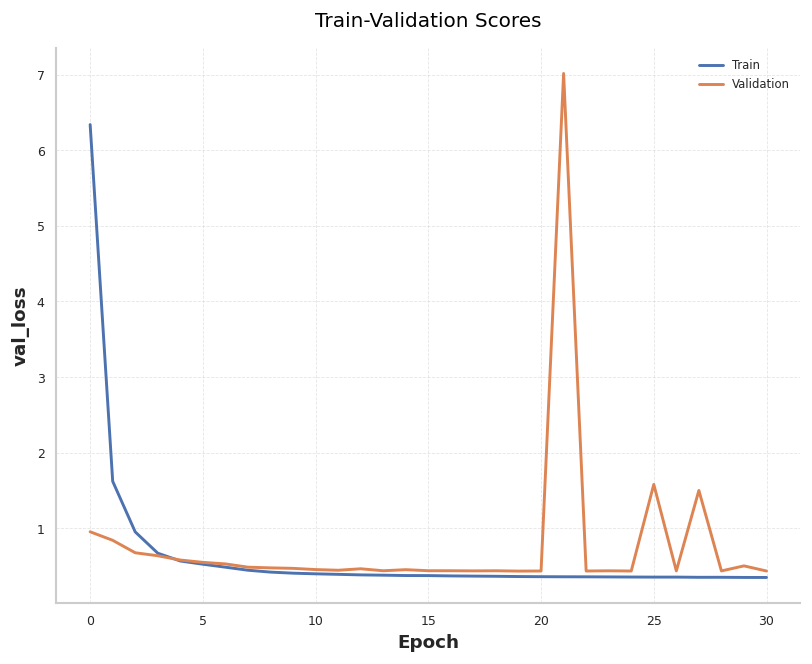

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Out-of-Fold Shapes: (32074,),(32074, 1)


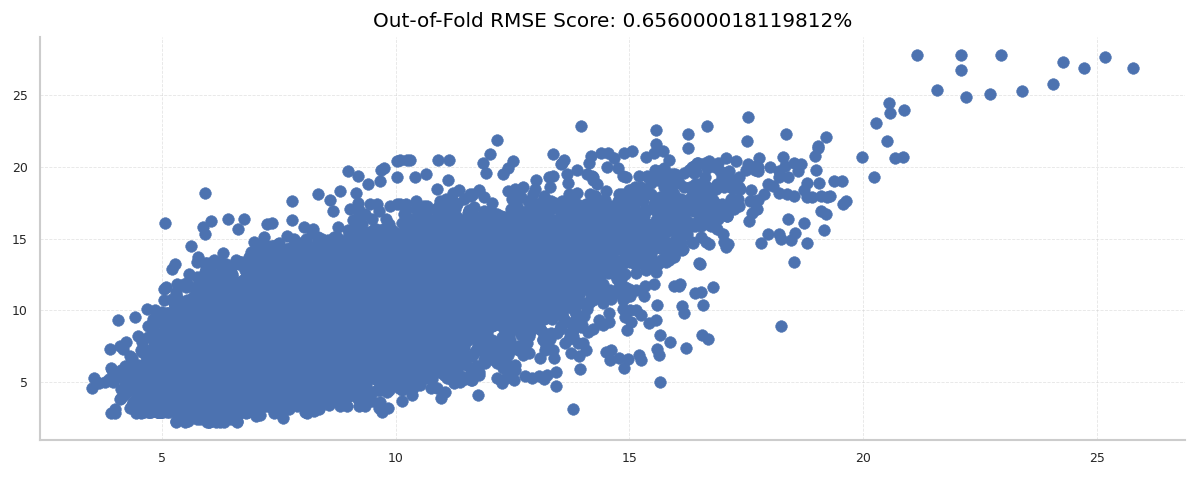

Out-of-Fold RMSE Score Rebased: 0.656000018119812%
Out-of-Fold RMSE Score Original: 1.9670000076293945%

Running CV 1

Start training the model...
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 9.8037 - mae: 1.3044 - rmse: 1.7314 - val_loss: 0.8600 - val_mae: 0.5083 - val_rmse: 0.6851 - learning_rate: 2.5000e-04
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 1.9009 - mae: 0.7048 - rmse: 0.9188 - val_loss: 0.7460 - val_mae: 0.4601 - val_rmse: 0.6199 - learning_rate: 2.5000e-04
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 1.0113 - mae: 0.5910 - rmse: 0.7771 - val_loss: 0.5794 - val_mae: 0.4693 - val_rmse: 0.6172 - learning_rate: 2.5000e-04
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.7054 - mae: 0.5294 - rmse: 0.7014 - val_loss: 0.5218 - val_mae: 0.4539 - val_rmse: 0.6081 - learning_rate: 2.5000e-04
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.5866 - mae: 0.4962 - rmse: 0.6598 - val_loss: 0.4899 - v

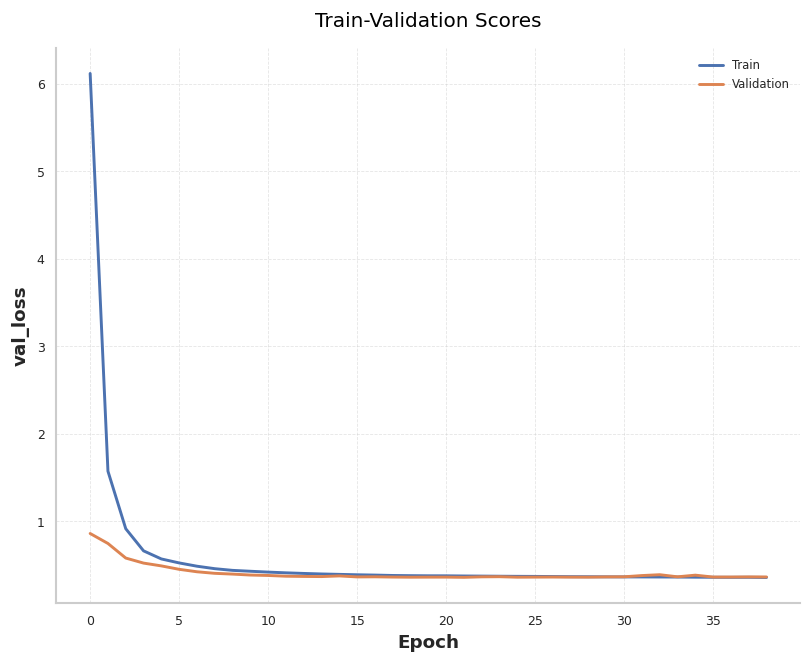

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Out-of-Fold Shapes: (27690,),(27690, 1)


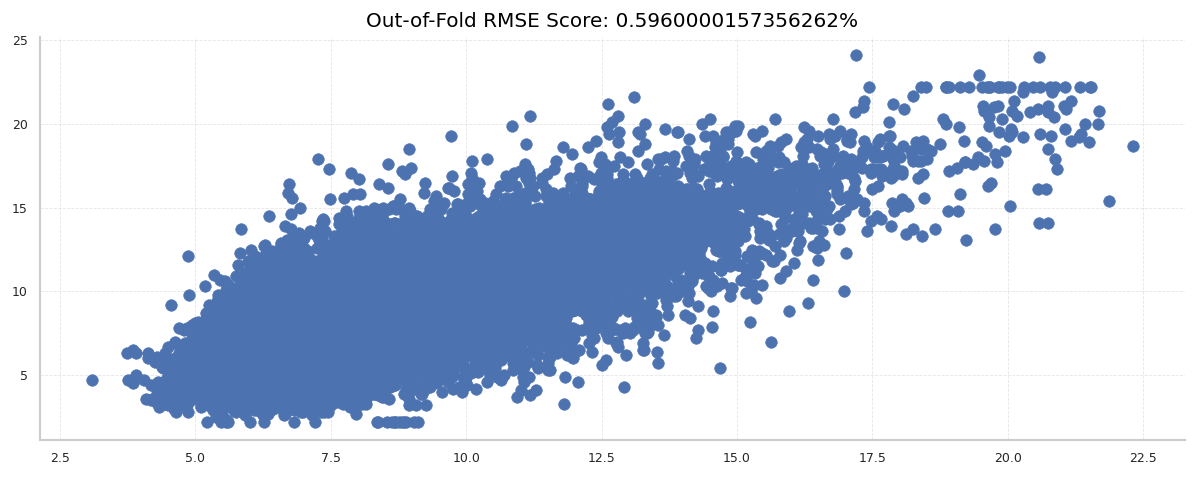

Out-of-Fold RMSE Score Rebased: 0.5960000157356262%
Out-of-Fold RMSE Score Original: 1.7869999408721924%

Running CV 2

Start training the model...
Epoch 1/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 9.7254 - mae: 1.2371 - rmse: 1.6772 - val_loss: 0.9960 - val_mae: 0.5357 - val_rmse: 0.7209 - learning_rate: 2.5000e-04
Epoch 2/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 1.7906 - mae: 0.6674 - rmse: 0.8788 - val_loss: 0.8351 - val_mae: 0.5092 - val_rmse: 0.6902 - learning_rate: 2.5000e-04
Epoch 3/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.9783 - mae: 0.5700 - rmse: 0.7547 - val_loss: 0.6749 - val_mae: 0.5128 - val_rmse: 0.6763 - learning_rate: 2.5000e-04
Epoch 4/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 0.6743 - mae: 0.5055 - rmse: 0.6721 - val_loss: 0.6230 - val_mae: 0.5046 - val_rmse: 0.6707 - learning_rate: 2.5000e-04
Epoch 5/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.5726 - mae: 0.4773 - rmse: 0.6375 - val_loss: 0.5886 - 

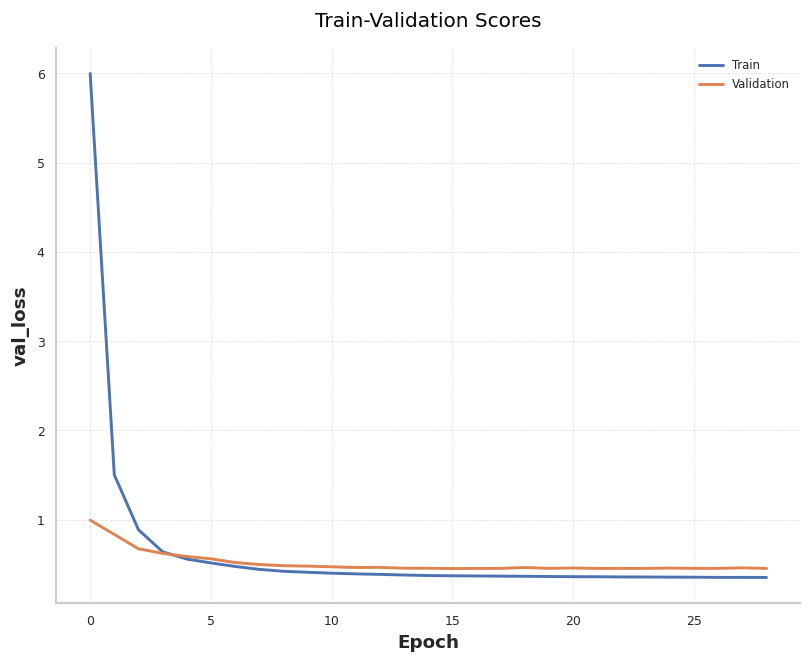

131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Out-of-Fold Shapes: (33365,),(33365, 1)


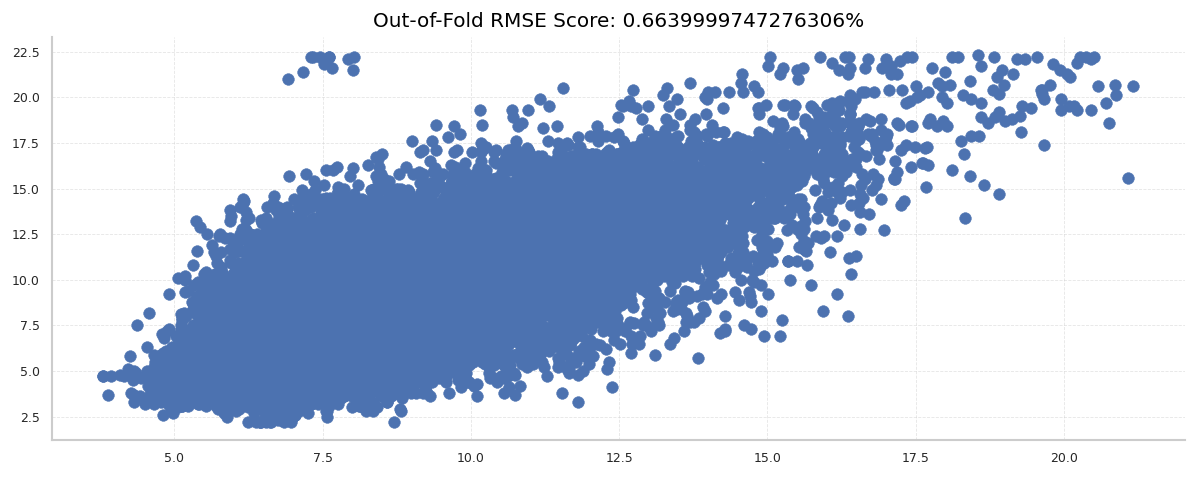

Out-of-Fold RMSE Score Rebased: 0.6639999747276306%
Out-of-Fold RMSE Score Original: 1.9880000352859497%

Running CV 3

Start training the model...
Epoch 1/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 10.4858 - mae: 1.3671 - rmse: 1.8298 - val_loss: 0.9525 - val_mae: 0.5296 - val_rmse: 0.7111 - learning_rate: 2.5000e-04
Epoch 2/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 2.1151 - mae: 0.7191 - rmse: 0.9347 - val_loss: 0.8159 - val_mae: 0.4906 - val_rmse: 0.6543 - learning_rate: 2.5000e-04
Epoch 3/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 1.0773 - mae: 0.6066 - rmse: 0.7918 - val_loss: 0.6609 - val_mae: 0.4733 - val_rmse: 0.6426 - learning_rate: 2.5000e-04
Epoch 4/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.7522 - mae: 0.5356 - rmse: 0.7087 - val_loss: 0.5690 - val_mae: 0.4649 - val_rmse: 0.6309 - learning_rate: 2.5000e-04
Epoch 5/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.6120 - mae: 0.4969 - rmse: 0.6632 - val_loss: 0.5393 -

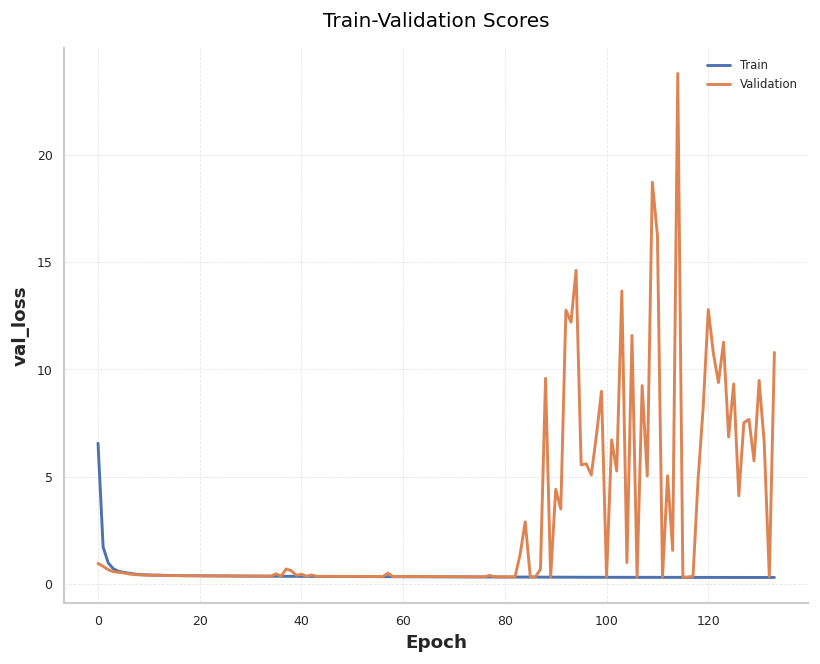

139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Out-of-Fold Shapes: (35405,),(35405, 1)


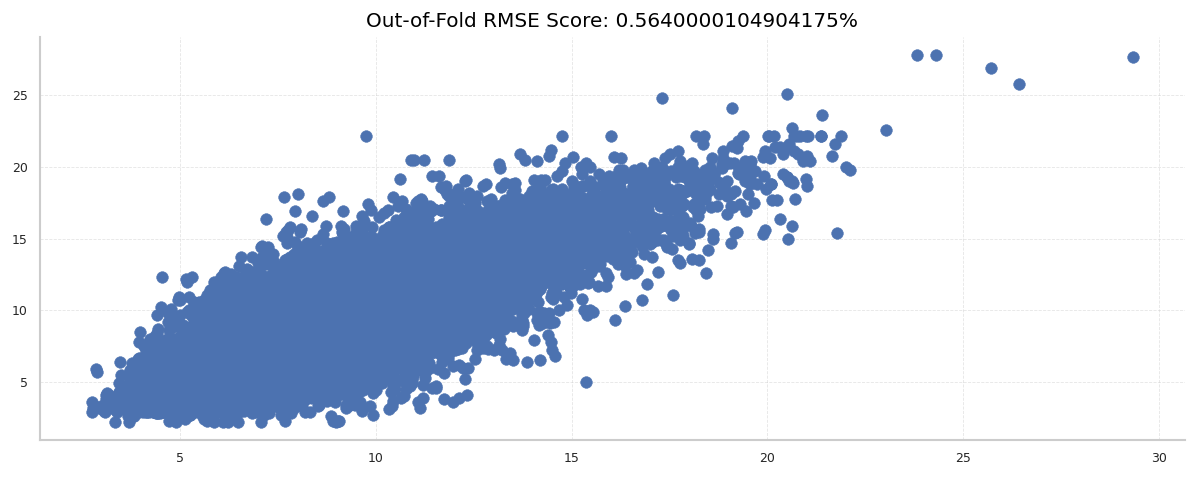

Out-of-Fold RMSE Score Rebased: 0.5640000104904175%
Out-of-Fold RMSE Score Original: 1.6890000104904175%

Running CV 4

Start training the model...
Epoch 1/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 9.5075 - mae: 1.2061 - rmse: 1.6174 - val_loss: 0.8590 - val_mae: 0.5134 - val_rmse: 0.6790 - learning_rate: 2.5000e-04
Epoch 2/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 1.8492 - mae: 0.7013 - rmse: 0.9230 - val_loss: 0.7985 - val_mae: 0.4960 - val_rmse: 0.6559 - learning_rate: 2.5000e-04
Epoch 3/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 1.0137 - mae: 0.5920 - rmse: 0.7797 - val_loss: 0.6280 - val_mae: 0.4864 - val_rmse: 0.6478 - learning_rate: 2.5000e-04
Epoch 4/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.6951 - mae: 0.5193 - rmse: 0.6889 - val_loss: 0.5745 - val_mae: 0.4765 - val_rmse: 0.6406 - learning_rate: 2.5000e-04
Epoch 5/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.5805 - mae: 0.4852 - rmse: 0.6476 - val_loss: 0.5452 - 

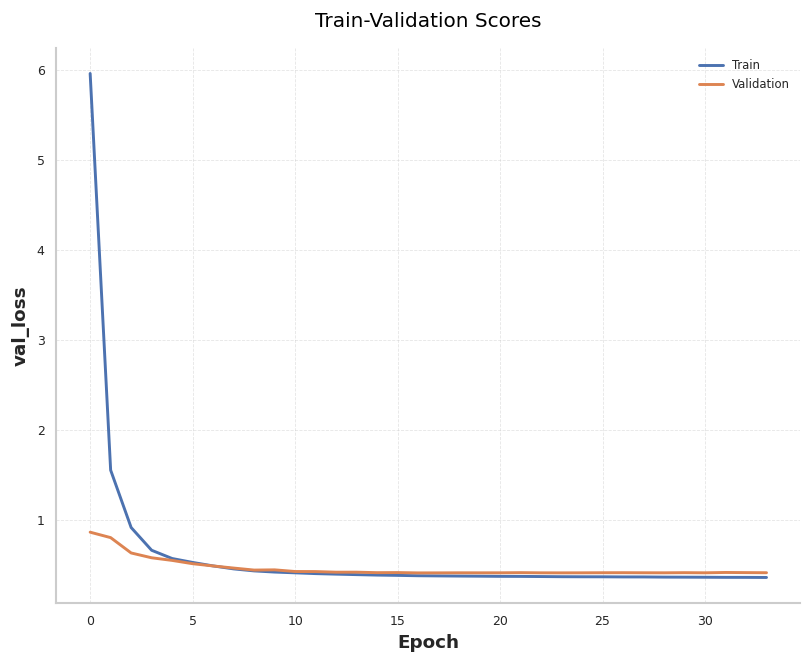

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Out-of-Fold Shapes: (25809,),(25809, 1)


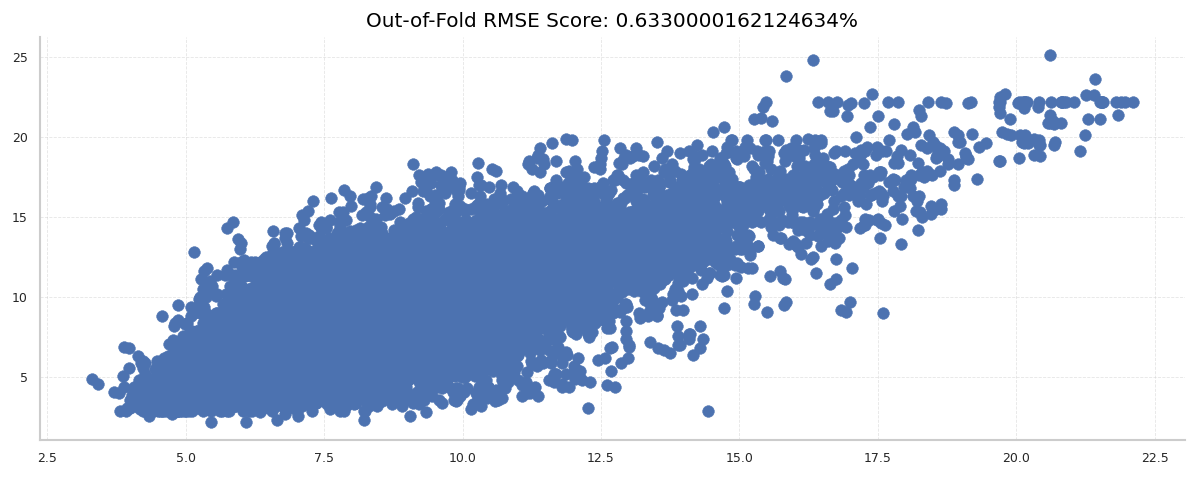

Out-of-Fold RMSE Score Rebased: 0.6330000162124634%
Out-of-Fold RMSE Score Original: 1.8980000019073486%
All Valuation RMSE: [1.967, 1.787, 1.988, 1.689, 1.898]


In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v2, best_params, split=val_sets,
                                 experiment_name="conv_v2_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(3.0,22.5, inplace=True)

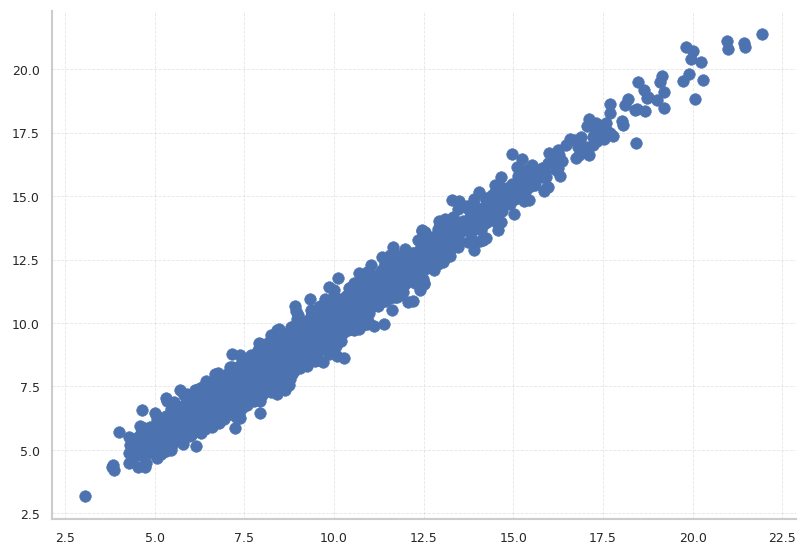

In [ ]:
plt.scatter(test_results_df[0],test_results_df[4])

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df.max(axis=0),test_results_df.min(axis=0)

(0          21.927965
 1          22.060429
 2          21.654076
 3               22.5
 4          21.372837
 average    21.673384
 dtype: object,
 0          3.068442
 1               3.0
 2          3.075196
 3               3.0
 4          3.176995
 average    3.310261
 dtype: object)

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v3_{col}.csv", index=False)
  print(sub.isna().sum())

id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64


## **2.4 MODEL 04**

### 3.1.1 Create Dataloader:

In [ ]:
X_train[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4",
          "enc_05_v4","enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7",
          "enc_08_v6","enc_04_v6","bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].describe()

PC_1          PC_2          PC_3     enc_04_v7     enc_01_v1  \
count  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05   
mean  -4.826985e-09 -5.602750e-10  6.895693e-10 -8.274831e-09 -4.137416e-09   
std    9.999828e-01  9.999737e-01  9.999759e-01  9.999878e-01  9.999880e-01   
min   -2.453617e+00 -7.056529e+00 -5.323506e+00 -7.688755e+00 -4.520487e+00   
25%   -7.271821e-01 -5.419594e-01 -5.714913e-01 -5.039006e-01 -5.109520e-01   
50%   -1.999196e-01 -1.193220e-02 -3.981280e-02  1.973245e-01  2.740409e-01   
75%    5.421631e-01  5.252303e-01  5.611614e-01  6.991614e-01  7.466551e-01   
max    7.496523e+00  5.465005e+00  5.448394e+00  3.064049e+00  1.647567e+00   

          enc_07_v7     enc_01_v4     enc_05_v4     enc_03_v6     enc_05_v7  \
count  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05   
mean   4.137416e-09  6.206124e-09 -9.309185e-09  6.206124e-09  1.379139e-08   
std    9.999871e-01  9.999834e-01  9.999859e-01  9.999807e-01  9.999837e-01   
min   -6.722575e+00 -2.818236e+00 -2.632238e+00 -7.368723e+00 -3.025878e+00   
25%   -5.287142e-01 -6.811557e-01 -6.928374e-01 -5.975201e-01 -6.807088e-01   
50%    1.180179e-01 -2.445951e-01 -2.303667e-01  3.371375e-02 -7.700081e-02   
75%    6.557984e-01  4.574431e-01  5.130194e-01  6.364418e-01  6.126646e-01   
max    4.911289e+00  5.543648e+00  5.448241e+00  3.377696e+00  5.206436e+00   

          enc_06_v6     enc_01_v6     enc_06_v7     enc_08_v6     enc_04_v6  \
count  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05  1.770240e+05   
mean  -1.379139e-09  8.274831e-09 -6.895693e-09  1.930794e-08 -2.068708e-09   
std    9.999808e-01  9.999878e-01  9.999866e-01  9.999840e-01  9.999787e-01   
min   -7.996515e+00 -6.613690e+00 -4.332072e+00 -3.823883e+00 -5.556360e+00   
25%   -5.501009e-01 -5.343025e-01 -6.644602e-01 -6.690663e-01 -6.034758e-01   
50%    1.032270e-01  1.781252e-01 -7.931243e-02 -7.793379e-02 -1.205760e-01   
75%    6.368309e-01  6.880558e-01  5.914223e-01  5.748741e-01  5.087022e-01   
max    4.248027e+00  3.745603e+00  5.880129e+00  6.116426e+00  7.085675e+00   

            bg-0:00  insulin_av-0:00    brake-0:00   intake-0:00  
count  1.770240e+05     1.770240e+05  1.770240e+05  1.770240e+05  
mean  -6.895693e-09     1.103311e-08 -1.792880e-08 -1.241225e-08  
std    1.000021e+00     9.999711e-01  9.999868e-01  1.000062e+00  
min   -2.027635e+00    -4.143014e+00 -4.128497e+00 -4.167593e+00  
25%   -7.263385e-01    -6.418152e-01 -6.512759e-01 -6.260164e-01  
50%   -1.924732e-01     1.286152e-02  5.215194e-02  2.334964e-01  
75%    5.415915e-01     6.866768e-01  6.942628e-01  6.977063e-01  
max    6.514209e+00     3.148856e+00  2.971527e+00  2.478187e+00

In [ ]:
X_test[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4",
          "enc_05_v4","enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7",
          "enc_08_v6","enc_04_v6","bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].describe()

PC_1         PC_2         PC_3    enc_04_v7    enc_01_v1  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean      0.226738    -0.030747     0.046944    -0.159802    -0.153419   
std       1.099712     1.078297     1.130656     1.121030     1.071102   
min      -2.278519    -4.925668    -4.446634    -6.201212    -4.511227   
25%      -0.535372    -0.622637    -0.578618    -0.650976    -0.652545   
50%       0.012488    -0.037744     0.012754     0.070307     0.141370   
75%       0.717718     0.559889     0.672757     0.558782     0.626758   
max       6.252427     4.736556     5.036873     3.629745     1.631168   

         enc_07_v7    enc_01_v4    enc_05_v4    enc_03_v6    enc_05_v7  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean     -0.235638     0.085670     0.099718    -0.206124    -0.344063   
std       1.060001     1.129255     1.077838     1.012304     1.025752   
min      -5.382534    -2.657492    -2.186869    -5.631176    -4.298613   
25%      -0.789332    -0.681330    -0.650661    -0.715077    -0.949883   
50%      -0.100872    -0.168736    -0.143686    -0.050899    -0.410086   
75%       0.415626     0.619610     0.635630     0.433961     0.239034   
max       3.735204     5.320841     5.075587     2.796038     4.460638   

         enc_06_v6    enc_01_v6    enc_06_v7    enc_08_v6    enc_04_v6  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean     -0.667269    -0.132634    -0.196418     0.614104    -0.384677   
std       1.136108     1.104986     1.075328     1.005842     1.088916   
min      -6.351604    -6.064824    -5.216065    -2.402086    -4.552610   
25%      -1.240938    -0.655137    -0.831372    -0.021322    -1.004960   
50%      -0.517173     0.022720    -0.273858     0.489272    -0.489934   
75%       0.049718     0.559158     0.411863     1.131435     0.171377   
max       3.931809     3.619982     4.182510     5.485085     4.347192   

           bg-0:00  insulin_av-0:00   brake-0:00  intake-0:00  
count  3644.000000      3644.000000  3644.000000  3644.000000  
mean      0.129674        -0.162698    -1.425088     0.103039  
std       1.083848         0.999508     1.440445     0.848795  
min      -2.027635        -3.457717    -6.397456    -3.931601  
25%      -0.659605        -0.794009    -2.153147    -0.090766  
50%      -0.092374        -0.208656    -1.451751     0.275378  
75%       0.675058         0.382451    -0.529557     0.607536  
max       5.446479         3.105266     2.579598     2.101114

In [ ]:
gc.collect()

35

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    static_df = dataframe.copy()


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
                                                         "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].values),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

In [ ]:
#X_train.filter(regex='insulin')

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,y.shape)

(1,) (1,) (1,) (1,) (1, 19) (1,)


In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177024 entries, p01_0 to p12_25298
Columns: 596 entries, hour to bg+1:00
dtypes: float32(592), int32(4)
memory usage: 407.9+ MB


### **2.1.3 Create Models:**

In [ ]:
def create_model_v3(dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    base=32,
                    rep=4,
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(19,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")
  all_feat = tabular_output

  # Dense layers for tabular data
  for num, den in enumerate(range(1,rep+1)):
    step = residual_block_dense(all_feat, base*den, activation=activation, normalization_type='batch', dropout_rate=dropout, name=f"block_{num}",  reg=reg,)
    all_feat = tf.keras.layers.concatenate([all_feat,step], name=f"concat_step_{num}")

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(all_feat)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v3(summary=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ minute_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hour_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lookup_min                │ (None, 1)              │              0 │ minute_input[0][0]     │
│ (IntegerLookup)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_pca (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_hour (Embedding)    │ (None, 1, 8)           │            192 │ hour_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_minute (Embedding)  │ (None, 1, 6)           │             72 │ lookup_min[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_cluster (Embedding) │ (None, 1, 8)           │            176 │ cluster_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_pca (Embedding)     │ (None, 1, 3)           │             12 │ cluster_pca[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 8)              │              0 │ embed_hour[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 6)              │              0 │ embed_minute[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 8)              │              0 │ embed_cluster[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 3)              │              0 │ embed_pca[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cont_inputs (InputLayer)  │ (None, 19)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tabular_concat            │ (None, 44)             │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0],       │
│                           │                        │                │ flatten_6[0][0],       │
│                           │                        │                │ flatten_7[0][0],       │
│                           │                        │                │ cont_inputs[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_01_block_0 (Dense)  │ (None, 32)             │          1,440 │ tabular_concat[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_01_block_0        

 Total params: 102,577 (400.69 KB)

 Trainable params: 101,937 (398.19 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True,
           #rankdir="LR",
           expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

[0, 1, 2, 3, 4]

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v3_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

13340

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

Train Shape: (144950, 596), Val Shape: (32074, 596)


In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

128.0

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('activation', ["relu","silu","selu","gelu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('rep', values=[3,4,5,6])
#  hp.Choice('base', values=[32,64,128])

In [ ]:
def create_turner_model(hp):

  model = create_model_v3(dropout=hp.get('dropout'),
                          rep=hp.get('rep'),
                          activation=hp.get('activation'),
                          reg=hp.get('reg'),
                          lr=0.0025,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

Trial 50 Complete [00h 01m 17s]
val_rmse: 0.6527590751647949

Best val_rmse So Far: 0.6506741046905518
Total elapsed time: 01h 47m 36s


In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

Results summary
Results in ./untitled_project
Showing 21 best trials
Objective(name="val_rmse", direction="min")

Trial 04 summary
Hyperparameters:
activation: silu
dropout: 0.375
reg: 0.0001
rep: 4
Score: 0.6506741046905518

Trial 19 summary
Hyperparameters:
activation: gelu
dropout: 0.35
reg: 0.001
rep: 4
Score: 0.6517762541770935

Trial 01 summary
Hyperparameters:
activation: gelu
dropout: 0.275
reg: 0.0001
rep: 4
Score: 0.6518661379814148

Trial 16 summary
Hyperparameters:
activation: gelu
dropout: 0.275
reg: 0.001
rep: 4
Score: 0.6523985862731934

Trial 26 summary
Hyperparameters:
activation: silu
dropout: 0.375
reg: 0.001
rep: 4
Score: 0.6525420546531677

Trial 29 summary
Hyperparameters:
activation: silu
dropout: 0.15
reg: 0.0001
rep: 3
Score: 0.6526084542274475

Trial 14 summary
Hyperparameters:
activation: silu
dropout: 0.375
reg: 0.0001
rep: 4
Score: 0.6527195572853088

Trial 49 summary
Hyperparameters:
activation: gelu
dropout: 0.25
reg: 0.0001
rep: 4
Score: 0.65275907516479

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)
  print(tuner.get_best_hyperparameters(5)[4].values)
  print(tuner.get_best_hyperparameters(6)[5].values)
  print(tuner.get_best_hyperparameters(7)[6].values)

{'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}
{'activation': 'gelu', 'dropout': 0.35, 'reg': 0.001, 'rep': 4}
{'activation': 'gelu', 'dropout': 0.275, 'reg': 0.0001, 'rep': 4}
{'activation': 'gelu', 'dropout': 0.275, 'reg': 0.001, 'rep': 4}
{'activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'rep': 4}
{'activation': 'silu', 'dropout': 0.15, 'reg': 0.0001, 'rep': 3}
{'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}


* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.35, 'reg': 0.001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.275, 'reg': 0.0001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.275, 'reg': 0.001, 'rep': 4}
* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'rep': 4}
* {'activation': 'silu', 'dropout': 0.15, 'reg': 0.0001, 'rep': 3}
* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}


* **Trial 21 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 64
Score: 1.9809489250183105

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 64
Score: 1.9827678203582764

* **Trial 10 summary**
Hyperparameters:
main_activation: silu
dropout: 0.30000000000000004
reg: 0.001
dense_layers: 128
conv_layers: 64
Score: 1.9926979541778564

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.001
dense_layers: 256
conv_layers: 64
Score: 1.9969719648361206

* **Trial 18 summary**
Hyperparameters:
main_activation: relu
dropout: 0.2
reg: 0.0001
dense_layers: 64
conv_layers: 64
Score: 2.0100858211517334

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}


Running CV 0

Start training the model...
Epoch 1/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.7641 - mae: 0.8473 - rmse: 1.1387 - val_loss: 0.8285 - val_mae: 0.4915 - val_rmse: 0.6634 - learning_rate: 2.5000e-04
Epoch 2/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.1604 - mae: 0.5756 - rmse: 0.7580 - val_loss: 0.8234 - val_mae: 0.4929 - val_rmse: 0.6576 - learning_rate: 2.5000e-04
Epoch 3/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8386 - mae: 0.5061 - rmse: 0.6699 - val_loss: 0.7150 - val_mae: 0.5187 - val_rmse: 0.6713 - learning_rate: 2.5000e-04
Epoch 4/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6507 - mae: 0.4727 - rmse: 0.6316 - val_loss: 0.6337 - val_mae: 0.5297 - val_rmse: 0.6808 - learning_rate: 2.5000e-04
Epoch 5/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5473 - mae: 0.4556 - rmse: 0.6136 - val_loss: 0.5465 - val_mae: 0.4893 - val_rmse: 0.6634 - learning_rate: 2.5000e-04
Epoch 6/200
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/ste

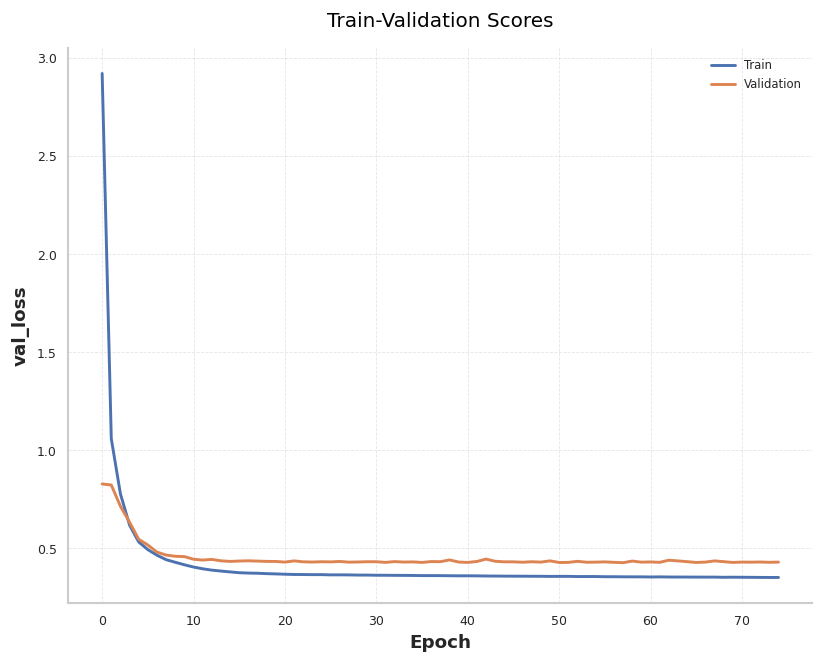

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Out-of-Fold Shapes: (32074,),(32074, 1)


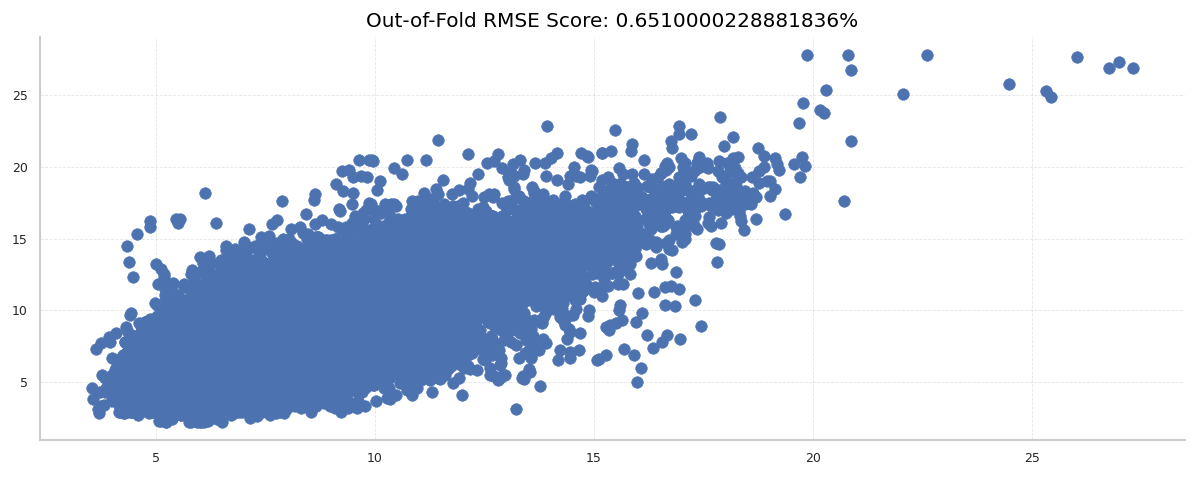

Out-of-Fold RMSE Score Rebased: 0.6510000228881836%
Out-of-Fold RMSE Score Original: 1.9520000219345093%

Running CV 1

Start training the model...
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 5.3021 - mae: 0.8978 - rmse: 1.2083 - val_loss: 0.7360 - val_mae: 0.4387 - val_rmse: 0.5987 - learning_rate: 2.5000e-04
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.2422 - mae: 0.5945 - rmse: 0.7853 - val_loss: 0.7540 - val_mae: 0.4370 - val_rmse: 0.5999 - learning_rate: 2.5000e-04
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.9038 - mae: 0.5198 - rmse: 0.6882 - val_loss: 0.6500 - val_mae: 0.4343 - val_rmse: 0.5947 - learning_rate: 2.5000e-04
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.7016 - mae: 0.4840 - rmse: 0.6450 - val_loss: 0.5567 - val_mae: 0.4403 - val_rmse: 0.5919 - learning_rate: 2.5000e-04
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6028 - mae: 0.4696 - rmse: 0.6313 - val_loss: 0.4784 - val_mae:

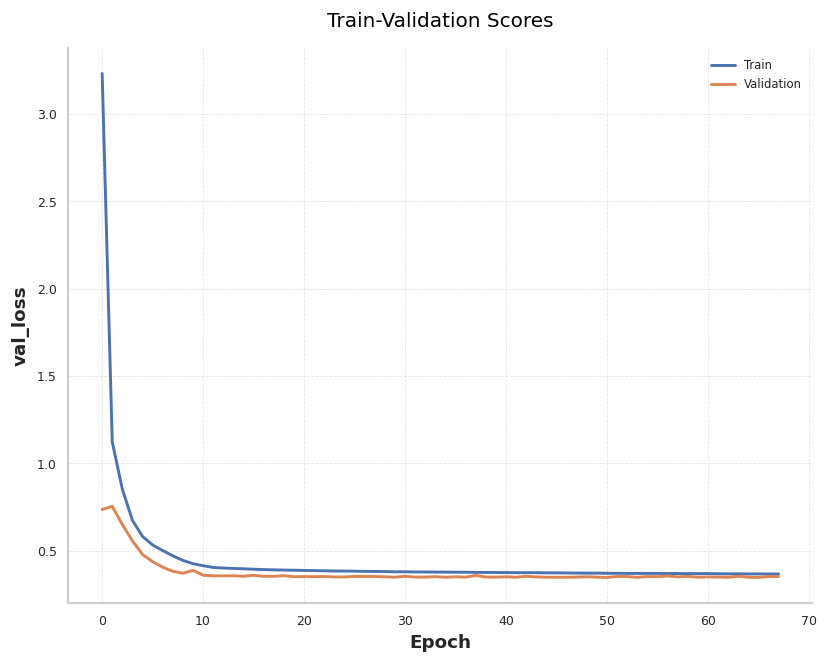

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Out-of-Fold Shapes: (27690,),(27690, 1)


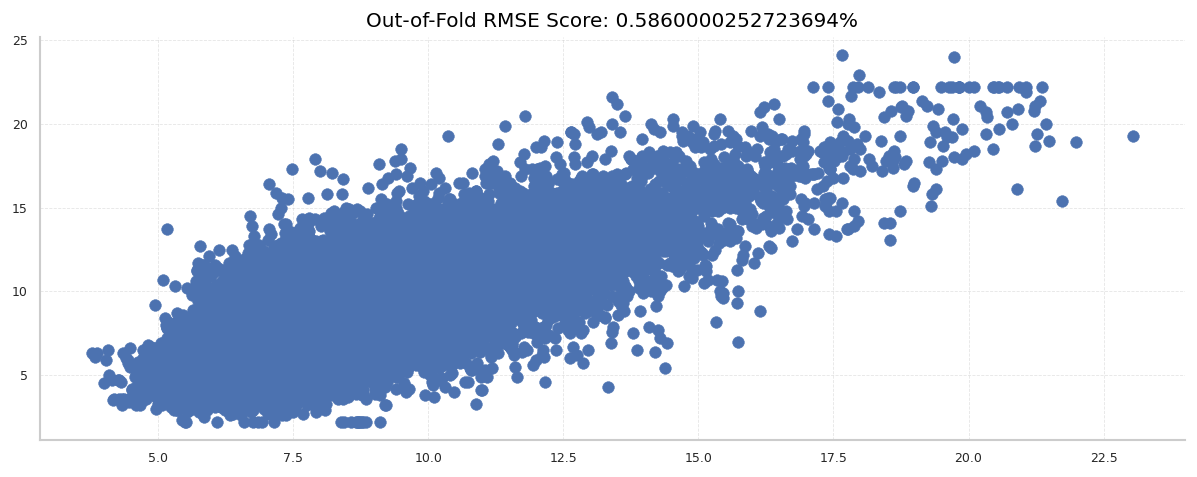

Out-of-Fold RMSE Score Rebased: 0.5860000252723694%
Out-of-Fold RMSE Score Original: 1.7569999694824219%

Running CV 2

Start training the model...
Epoch 1/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5.2594 - mae: 0.8820 - rmse: 1.1914 - val_loss: 0.9099 - val_mae: 0.5011 - val_rmse: 0.6691 - learning_rate: 2.5000e-04
Epoch 2/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.2211 - mae: 0.5854 - rmse: 0.7723 - val_loss: 0.8597 - val_mae: 0.5026 - val_rmse: 0.6670 - learning_rate: 2.5000e-04
Epoch 3/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8920 - mae: 0.5153 - rmse: 0.6825 - val_loss: 0.7373 - val_mae: 0.4943 - val_rmse: 0.6631 - learning_rate: 2.5000e-04
Epoch 4/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.6918 - mae: 0.4831 - rmse: 0.6435 - val_loss: 0.6266 - val_mae: 0.4928 - val_rmse: 0.6590 - learning_rate: 2.5000e-04
Epoch 5/200
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5614 - mae: 0.4591 - rmse: 0.6162 - val_loss: 0.5623 - val_mae: 0

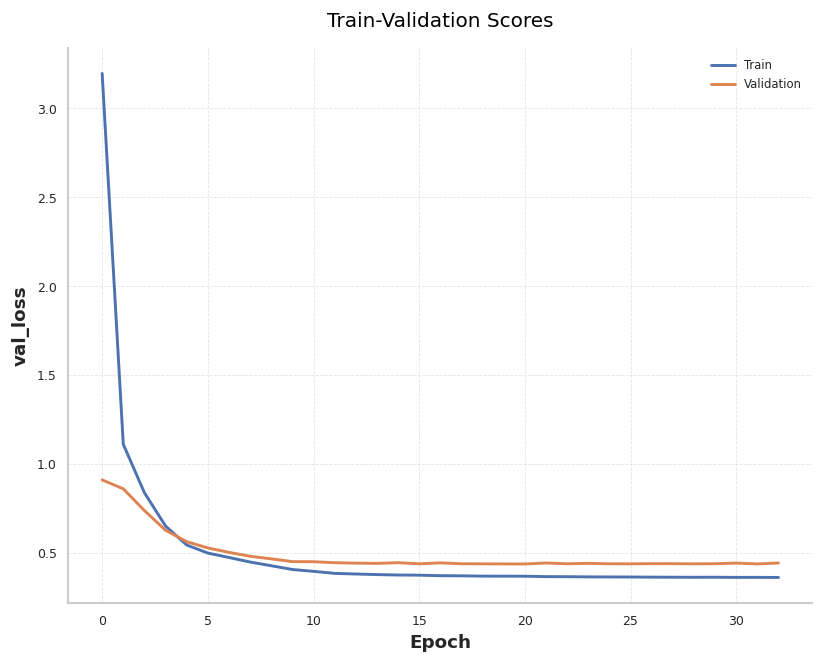

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Out-of-Fold Shapes: (33365,),(33365, 1)


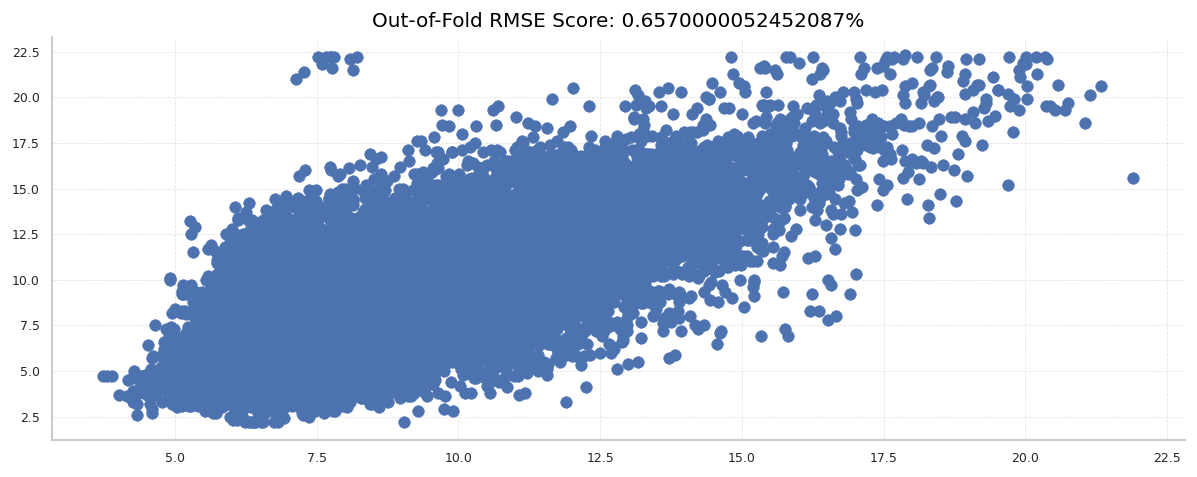

Out-of-Fold RMSE Score Rebased: 0.6570000052452087%
Out-of-Fold RMSE Score Original: 1.968999981880188%

Running CV 3

Start training the model...
Epoch 1/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5.6251 - mae: 0.9243 - rmse: 1.2509 - val_loss: 0.7776 - val_mae: 0.4589 - val_rmse: 0.6244 - learning_rate: 2.5000e-04
Epoch 2/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.2614 - mae: 0.5946 - rmse: 0.7828 - val_loss: 0.7777 - val_mae: 0.4552 - val_rmse: 0.6198 - learning_rate: 2.5000e-04
Epoch 3/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.9085 - mae: 0.5200 - rmse: 0.6880 - val_loss: 0.6914 - val_mae: 0.4696 - val_rmse: 0.6252 - learning_rate: 2.5000e-04
Epoch 4/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7065 - mae: 0.4858 - rmse: 0.6473 - val_loss: 0.5881 - val_mae: 0.4634 - val_rmse: 0.6209 - learning_rate: 2.5000e-04
Epoch 5/200
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.5905 - mae: 0.4654 - rmse: 0.6250 - val_loss: 0.5046 - val_mae: 0.

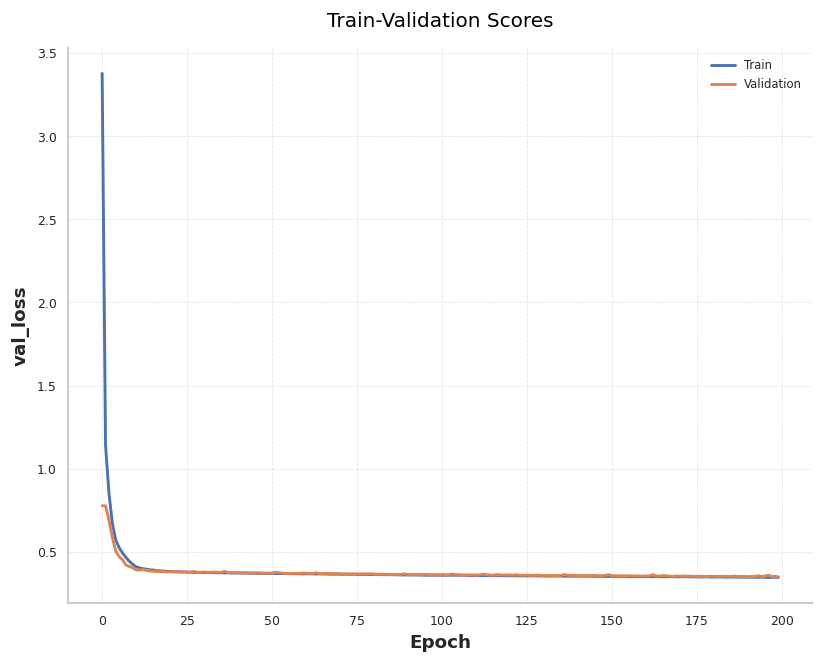

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Out-of-Fold Shapes: (35405,),(35405, 1)


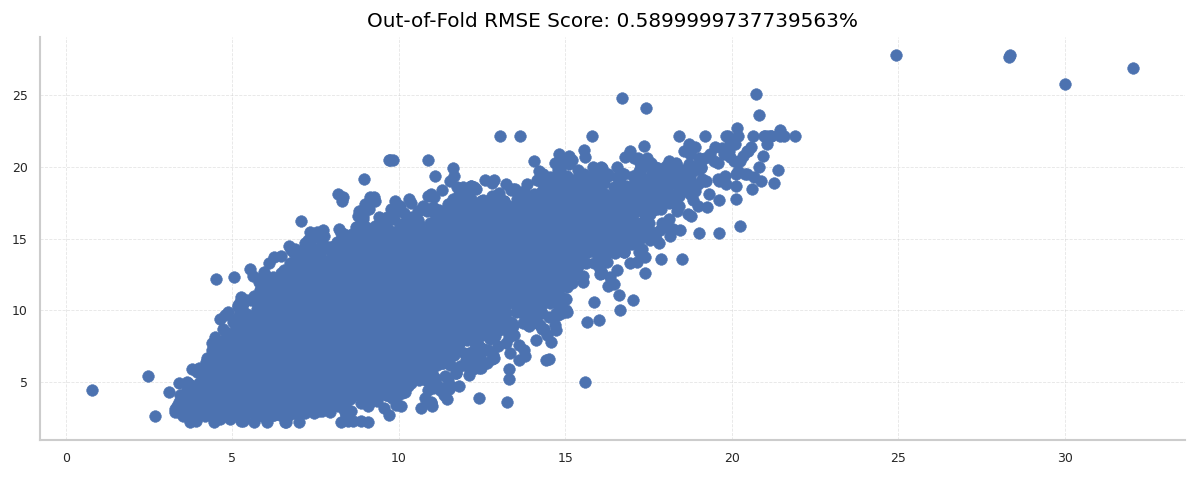

Out-of-Fold RMSE Score Rebased: 0.5899999737739563%
Out-of-Fold RMSE Score Original: 1.7669999599456787%

Running CV 4

Start training the model...
Epoch 1/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.3019 - mae: 0.8683 - rmse: 1.1777 - val_loss: 0.7870 - val_mae: 0.4654 - val_rmse: 0.6327 - learning_rate: 2.5000e-04
Epoch 2/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.1865 - mae: 0.5750 - rmse: 0.7599 - val_loss: 0.7905 - val_mae: 0.4609 - val_rmse: 0.6305 - learning_rate: 2.5000e-04
Epoch 3/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8717 - mae: 0.5105 - rmse: 0.6772 - val_loss: 0.6828 - val_mae: 0.4634 - val_rmse: 0.6313 - learning_rate: 2.5000e-04
Epoch 4/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6821 - mae: 0.4793 - rmse: 0.6403 - val_loss: 0.5753 - val_mae: 0.4607 - val_rmse: 0.6301 - learning_rate: 2.5000e-04
Epoch 5/200
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5616 - mae: 0.4611 - rmse: 0.6204 - val_loss: 0.5069 - val_mae: 0

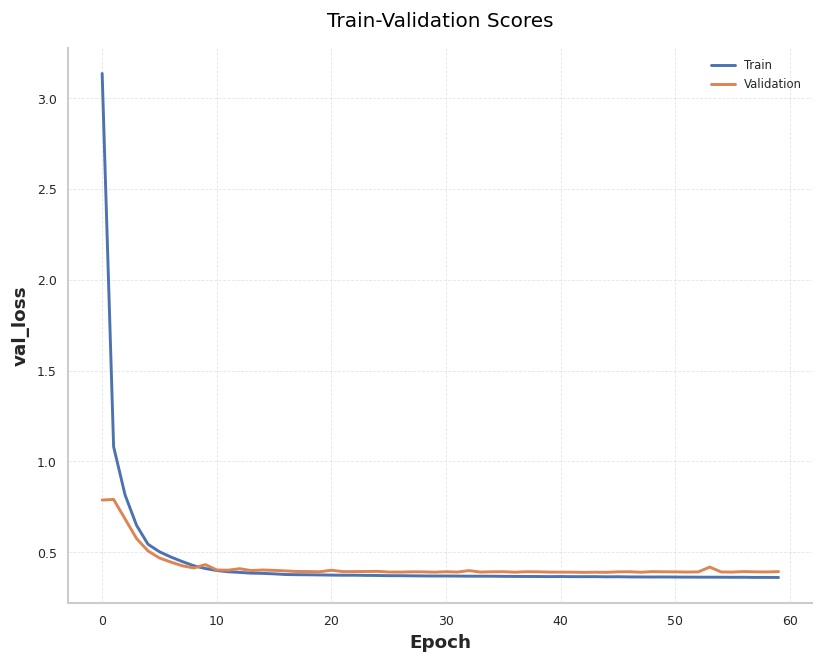

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Out-of-Fold Shapes: (25809,),(25809, 1)


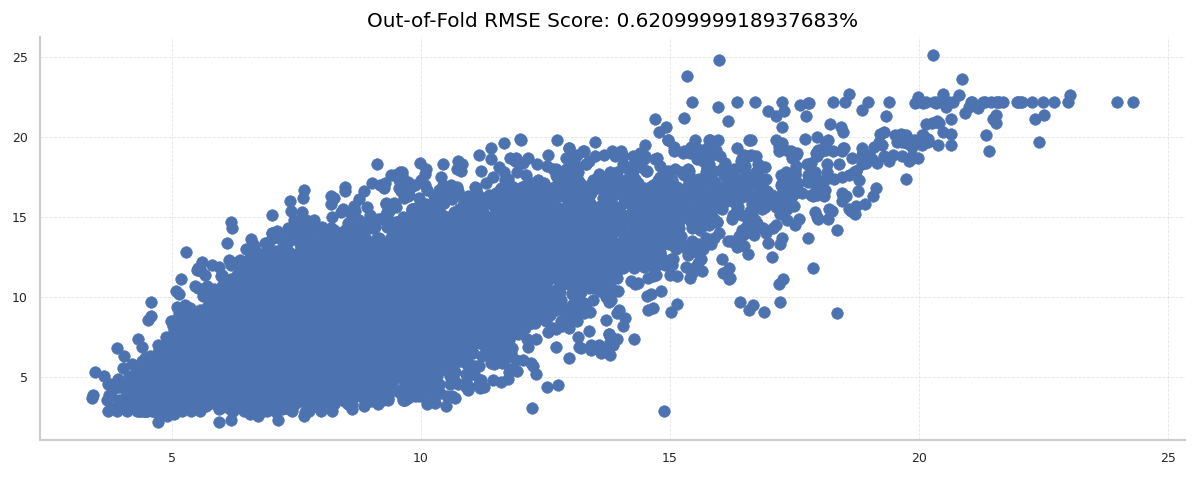

Out-of-Fold RMSE Score Rebased: 0.6209999918937683%
Out-of-Fold RMSE Score Original: 1.8609999418258667%
All Valuation RMSE: [1.952, 1.757, 1.969, 1.767, 1.861]


In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v3, best_params, split=val_sets,
                                 experiment_name="conv_v3_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(2.9, 22.5, inplace=True)
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

0          1          2         3          4    average
id                                                                       
p01_8459   8.728735   8.590931   9.007306  8.622768   9.027678   8.795484
p01_8460   5.986555   6.102639   6.165151    5.0089   5.665824   5.785814
p01_8461   6.163647   6.836599   6.626565  6.040013   6.701444   6.473654
p01_8462  10.715000  10.696807  11.142361  9.922757  11.171182  10.729621
p01_8463   6.066624   6.325787   6.681554  6.161382    6.54179   6.355427
...             ...        ...        ...       ...        ...        ...
p24_256    6.224494   6.392139   6.505722  6.150546   6.323865   6.319353
p24_257    8.659627    8.74286   9.026999  8.223902   8.759951   8.682668
p24_258    6.640740   7.013635   6.998216  6.980576   6.740136    6.87466
p24_259    8.056828   8.158039   8.350607  7.922277   8.138029   8.125156
p24_260    5.949270   6.115591   6.050055  5.908273   5.872674   5.979172

[3644 rows x 6 columns]

In [ ]:
check_res = test_results_df.clip(2.9, 22.5)

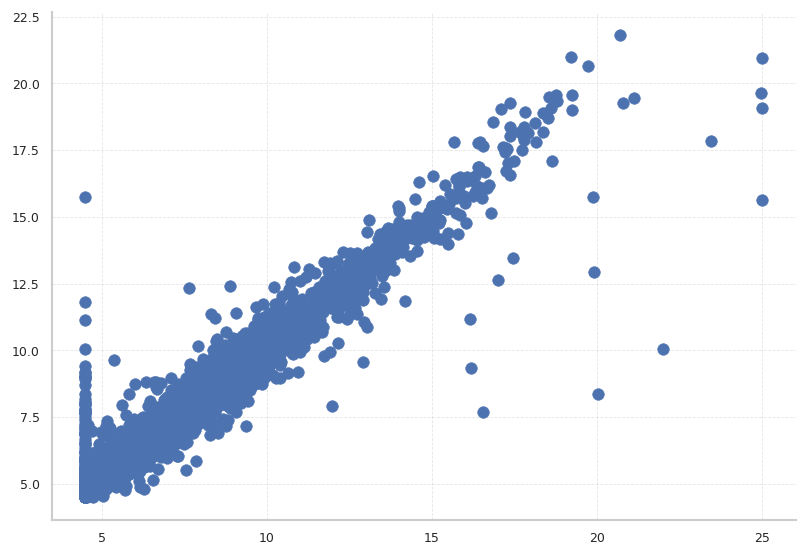

In [ ]:
plt.scatter(check_res[0],check_res[2])

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v4_{col}.csv", index=False)
  print(sub.isna().sum())

## **2.4 MODEL 05**

### 3.1.1 Create Dataloader:

In [40]:
gc.collect()

47

In [41]:
# X_train[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
#          "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
#          "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].corr().style.background_gradient(cmap='coolwarm')

In [44]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    static_df = dataframe.copy()


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
                                                         "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].values),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [45]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [48]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,y.shape)

(1,) (1,) (1,) (1,) (1, 19) (1,)


In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [49]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [50]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177024 entries, p01_0 to p12_25298
Columns: 596 entries, hour to bg+1:00
dtypes: float32(592), int32(4)
memory usage: 407.9+ MB


### **2.1.3 Create Models:**

In [53]:
def create_model_v4(dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    dense_layers=[256,128,128,64],
                    norm="batch",
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(19,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")
  x = tabular_output

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    x = dense_block(den, dropout=dropout, activation=activation, reg=reg, name=f"Dense_block_{num}", normalization_type=norm)(x)

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(x)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v4(summary=True)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ minute_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hour_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lookup_min                │ (None, 1)              │              0 │ minute_input[0][0]     │
│ (IntegerLookup)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cluster_pca (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_hour (Embedding)    │ (None, 1, 8)           │            192 │ hour_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_minute (Embedding)  │ (None, 1, 6)           │             72 │ lookup_min[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_cluster (Embedding) │ (None, 1, 8)           │            176 │ cluster_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_pca (Embedding)     │ (None, 1, 3)           │             12 │ cluster_pca[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8)              │              0 │ embed_hour[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 6)              │              0 │ embed_minute[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 8)              │              0 │ embed_cluster[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 3)              │              0 │ embed_pca[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cont_inputs (InputLayer)  │ (None, 19)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tabular_concat            │ (None, 44)             │              0 │ flatten[0][0],         │
│ (Concatenate)             │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0],       │
│                           │                        │                │ flatten_3[0][0],       │
│                           │                        │                │ cont_inputs[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense_block_0             │ (None, 256)            │         12,544 │ tabular_concat[0][0]   │
│ (Sequential)              │                        │                │                        │
├──────────────────────

 Total params: 72,005 (281.27 KB)

 Trainable params: 70,853 (276.77 KB)

 Non-trainable params: 1,152 (4.50 KB)

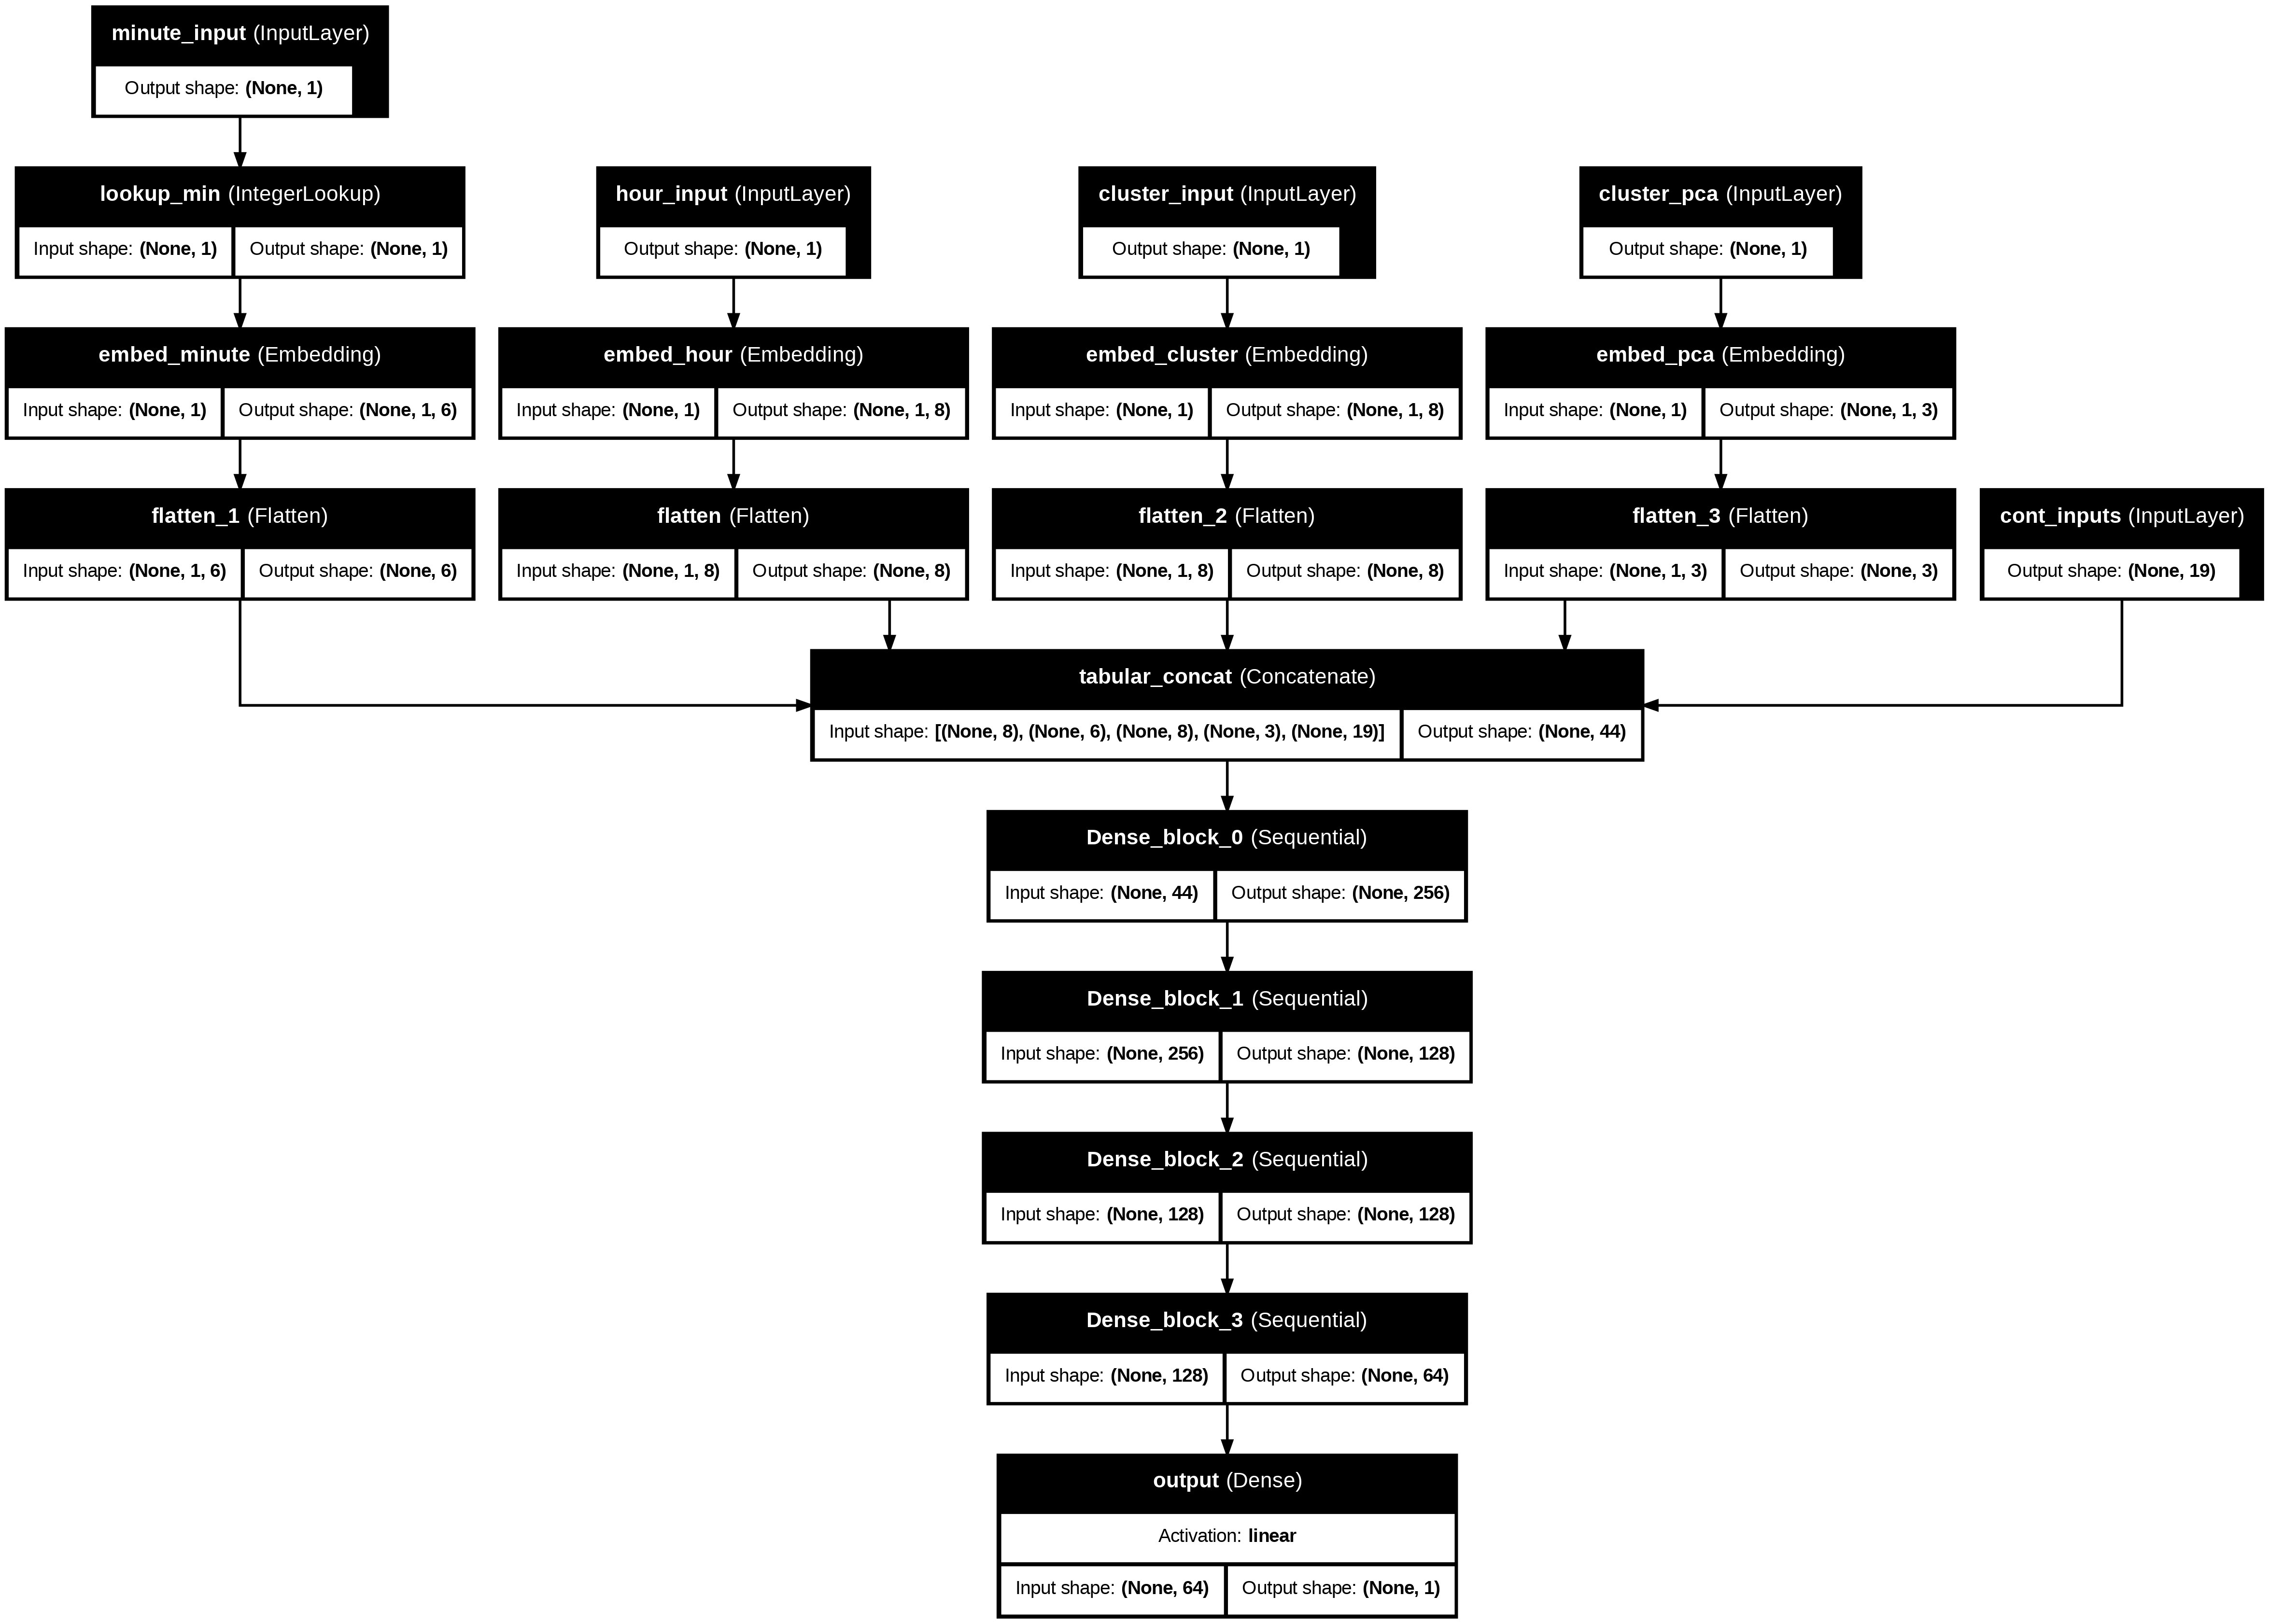

In [55]:
plot_model(model, show_shapes=True, show_layer_names=True,
           #rankdir="LR",
           expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [57]:
list(range(len(val_sets)))

[0, 1, 2, 3, 4]

#### Main Function:

In [58]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v4_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [59]:
tuning_on=True
gc.collect()

13534

 Select a Validation set:

In [61]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

Train Shape: (144950, 596), Val Shape: (32074, 596)


In [62]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [63]:
512/4

128.0

In [64]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","selu","gelu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128])
  hp.Choice('norm', values=["batch","layer"])

In [67]:
def create_turner_model(hp):

  model = create_model_v4(dropout=hp.get('dropout'),
                    activation=hp.get('main_activation'),
                    reg=hp.get('reg'),
                    lr=0.001,
                    dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                    norm=hp.get('norm'))

  return model

In [68]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

Trial 50 Complete [00h 03m 11s]
val_rmse: 0.6541268825531006

Best val_rmse So Far: 0.6541268825531006
Total elapsed time: 02h 07m 22s


In [69]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

Results summary
Results in ./untitled_project
Showing 21 best trials
Objective(name="val_rmse", direction="min")

Trial 49 summary
Hyperparameters:
main_activation: gelu
dropout: 0.2
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6541268825531006

Trial 23 summary
Hyperparameters:
main_activation: gelu
dropout: 0.175
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6549822688102722

Trial 05 summary
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 256
norm: batch
Score: 0.6553966403007507

Trial 25 summary
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 512
norm: batch
Score: 0.6563018560409546

Trial 12 summary
Hyperparameters:
main_activation: gelu
dropout: 0.225
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6568679213523865

Trial 48 summary
Hyperparameters:
main_activation: gelu
dropout: 0.325
reg: 0.0001
dense_layers: 128
norm: layer
Score: 0.6574869155883789

Trial 17 summary
Hyperparameters:
main_activation: gelu

In [70]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

{'main_activation': 'gelu', 'dropout': 0.2, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
{'main_activation': 'gelu', 'dropout': 0.175, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
{'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 256, 'norm': 'batch'}
{'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 512, 'norm': 'batch'}


* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 512, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.30, 'reg': 0.001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'dense_layers': 256, 'conv_layers': 64}

* **Trial 21 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 64
Score: 1.9809489250183105

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 64
Score: 1.9827678203582764

* **Trial 10 summary**
Hyperparameters:
main_activation: silu
dropout: 0.30000000000000004
reg: 0.001
dense_layers: 128
conv_layers: 64
Score: 1.9926979541778564

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.001
dense_layers: 256
conv_layers: 64
Score: 1.9969719648361206

* **Trial 18 summary**
Hyperparameters:
main_activation: relu
dropout: 0.2
reg: 0.0001
dense_layers: 64
conv_layers: 64
Score: 2.0100858211517334

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': [512,256,128], 'conv_layers': [64,32,16]}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v1, best_params, split=val_sets,
                                 experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v1_{col}.csv", index=False)
  print(sub.isna().sum())